In [1]:
import pandas as pd
import numpy as np
import os
import sys
from db_utils import RDSDatabaseConnector
from data_extraction import DataExtractor
from data_transformer import DataTransformer
from data_frame_info import DataFrameInfo
from plotter import Plotter
current_directory = os.getcwd()


## Extracting the online shopping data from the cloud

We begin by first extracting our data from an RDS database 
Ensure you have a yaml_file initialised with the correct credentials to access the RDS Database


In [2]:
# Path to the credentials file
yaml_file = "credentials.yaml"

# Initialize the database connector
db_connector = RDSDatabaseConnector(yaml_file)


# Initialize the data extractor with the database connector's engine
data_extractor = DataExtractor(db_connector.engine)

# Task 3 Step 6: Extract data from the 'customer_activity' table
table_name = "customer_activity"
data = data_extractor.read_rds_table(table_name)


Our db_connector utilizes the credentials from the YAML file to initialize a SQLAlchemy engine for database connections. 
This engine is passed to our data_extractor, enabling it to retrieve the customer activity data. 

We save this data into a CSV file on our local machine to avoid repeatedly connecting to the database, thereby accelerating our exploratory data analysis process.

In [3]:
csv_file_path = os.path.join(current_directory, 'customer_activity.csv')
data_extractor.save_to_csv(data, csv_file_path) # Saving data to a CSV file

Next step will be to load the data onto our panda dataframe, and to gather information on the nature of our dataset
so we can decide what the best way to clean/transform it is.



In [4]:
# Loading our data onto a dataframe
df = pd.read_csv(csv_file_path)

# Display the first few rows of the dataframe
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   administrative            11760 non-null  float64
 1   administrative_duration   11418 non-null  float64
 2   informational             12330 non-null  int64  
 3   informational_duration    11994 non-null  float64
 4   product_related           11751 non-null  float64
 5   product_related_duration  12129 non-null  float64
 6   bounce_rates              12330 non-null  float64
 7   exit_rates                12330 non-null  float64
 8   page_values               12330 non-null  float64
 9   month                     12330 non-null  object 
 10  operating_systems         12319 non-null  object 
 11  browser                   12330 non-null  object 
 12  region                    12330 non-null  object 
 13  traffic_type              12330 non-null  object 
 14  visito

,administrative,administrative_duration,informational,informational_duration,product_related,product_related_duration,bounce_rates,exit_rates,page_values,month,operating_systems,browser,region,traffic_type,visitor_type,weekend,revenue
0,0.0,0.0,0,0.0,4.0,0.0,0.2000,0.200,0.0,May,Android,Google Chrome,North America,Twitter,Returning_Visitor,False,False
1,0.0,0.0,0,0.0,26.0,876.0,0.0000,0.026,0.0,Nov,Windows,Google Chrome,Western Europe,Google search,Returning_Visitor,True,False
2,2.0,99.4,0,0.0,19.0,368.0,0.0396,0.052,0.0,Sep,Windows,Google Chrome,Asia,Twitter,Returning_Visitor,False,False
3,0.0,0.0,0,0.0,20.0,1432.0,0.0248,0.028,1.8,Dec,Windows,Google Chrome,Western Europe,Instagram ads,Returning_Visitor,False,True
4,0.0,0.0,0,0.0,33.0,694.0,0.0141,0.032,0.0,May,Android,Google Chrome,North America,Instagram ads,Returning_Visitor,False,False


### Dataset Description

The dataset consists of 17 columns with various data types and contains 12,330 entries. Below is a brief description of each column:

- **administrative**: Number of administrative pages visited by the user.
- **administrative_duration**: Duration spent on administrative pages.
- **informational**: Number of informational pages visited by the user.
- **informational_duration**: Duration spent on informational pages.
- **product_related**: Number of product-related pages visited by the user.
- **product_related_duration**: Duration spent on product-related pages.
- **bounce_rates**: Percentage of visitors who enter the site and then leave ("bounce") rather than continuing to view other pages within the same site.
- **exit_rates**: Percentage of pageviews on the site that were the last in the session.
- **page_values**: Metrics assigned to a page to quantify its economic value.
- **month**: Month of the year when the activity was recorded.
- **operating_systems**: Type of operating system used by the visitor.
- **browser**: Type of browser used by the visitor.
- **region**: Geographical region of the visitor.
- **traffic_type**: Source of the traffic, such as search engines or social media.
- **visitor_type**: Whether the visitor is new or returning.
- **weekend**: Whether the activity was recorded on a weekend.
- **revenue**: Whether the visit resulted in a transaction.

## Exploratory Data Analysis

From our analysis we can see that we have various columns which dont have their data types initilised, they are in "object" format. From the title of these columns they appear to be categorical, before converting it we will take a closer look.

In [5]:
print("Number of distinct values in each column:")
df[['month','operating_systems', 'browser', 'region', 'traffic_type', 'visitor_type']].nunique()

Number of distinct values in each column:


month                10
operating_systems     7
browser              13
region                9
traffic_type         19
visitor_type          3
dtype: int64

Our assumption is correct, they all have limited unique values, meaning it would make sense to change the column to categorical data type. This will not only conserve memory but allow us to do specialised analysis later on if we deem necessary. We will use our DataTransformer class, a class we created in 'data_transformer.py' to handle this dataset.

In [6]:
data_transformer = DataTransformer(df)
df = data_transformer.convert_columns(['month','operating_systems', 'browser', 'region', 'traffic_type', 'visitor_type'], dtype='category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   administrative            11760 non-null  float64 
 1   administrative_duration   11418 non-null  float64 
 2   informational             12330 non-null  int64   
 3   informational_duration    11994 non-null  float64 
 4   product_related           11751 non-null  float64 
 5   product_related_duration  12129 non-null  float64 
 6   bounce_rates              12330 non-null  float64 
 7   exit_rates                12330 non-null  float64 
 8   page_values               12330 non-null  float64 
 9   month                     12330 non-null  category
 10  operating_systems         12319 non-null  category
 11  browser                   12330 non-null  category
 12  region                    12330 non-null  category
 13  traffic_type              12330 non-null  cate

The next step will be to  take a closer look at our null values and decide how to handle it.
In the data_frame_info.py I have creaeted a clas with various methods to retrieve information. 

In [7]:
# Preforming further inspection
df_info = DataFrameInfo(df)
df_info.null_percentage()



administrative              4.622871
administrative_duration     7.396594
informational               0.000000
informational_duration      2.725061
product_related             4.695864
product_related_duration    1.630170
bounce_rates                0.000000
exit_rates                  0.000000
page_values                 0.000000
month                       0.000000
operating_systems           0.089213
browser                     0.000000
region                      0.000000
traffic_type                0.000000
visitor_type                0.000000
weekend                     0.000000
revenue                     0.000000
dtype: float64

### Handling Missing Data

The columns with the missing values are:

- **administrative**: 4.62% missing
- **administrative_duration**: 7.40% missing
- **product_related**: 4.70% missing
- **informational_duration**: 2.73% missing
- **product_related_duration**: 1.630170
- **operating_systems**: 0.089213%

#### Addressing Missing Data

We have several options for handling missing data:

1. **Drop the rows or columns with missing values.**
2. **Replace the missing values with statistical measures such as the mean, mode, or median.**
3. **Apply advanced imputation methods like K-Nearest Neighbors (KNN).**

#### Missing Data Mechanisms

Before proceeding, it is important to determine if our missing data is Missing Completely At Random (MCAR) or Not Missing At Random (NMAR).

- **MCAR**: The missingness is independent of any observed or unobserved data. This means the missing data does not depend on other values in the dataset. For instance, if the missing values in `informational_duration` were randomly distributed, it would be considered MCAR. This type of missing data introduces little to no bias.

- **NMAR**: The missingness depends on unobserved data. For example, if users who spend very short or very long times on administrative pages are more likely to have missing values in `administrative_duration`, then the data is NMAR. This tpye of misisng data can introduce significant bias and will require advanced stastistical techniques to address.

#### Example from Our Dataset

Consider the `administrative_duration` column, which has 7.40% missing values. If these missing values are NMAR, it could be due to technical issues such as session timeouts for long durations. If we ignore this and impute using the mean or median, we risk skewing our results. 

For example, if users who spend longer on administrative pages are not recorded, we might incorrectly conclude that shorter page durations are more effective for user engagement and generating revenue. This could lead us to reduce the amount of content on administrative pages, potentially harming the user experience and negatively impacting business outcomes. 

### Next Step

We wil run a stastistical test to see if our msising data is **MCAR** or **NMAR**

A more detailed analysis, such as examining correlations between `administrative_duration` and other variables, followed by statistical tests, can help determine the nature of the missingness. If the missingness is related to the values, we would need to employ more sophisticated imputation methods or account for the missingness in our modeling process.


### Testing for Missing Completely At Random (MCAR)

We will be running Little's MCAR test to determine if the missing data in our dataset is missing completely at random.

**Null Hypothesis (H0):** The data is missing completely at random (MCAR).

**Alternative Hypothesis (H1):** The data is not missing completely at random (not MCAR).

We will use a p-value to determine the result of the test:
- If the p-value is greater than the significance level (commonly 0.05), we fail to reject the null hypothesis, indicating the data is MCAR.
- If the p-value is less than or equal to the significance level, we reject the null hypothesis, indicating the data is not MCAR.


In [8]:
# import pandas as pd
from pyampute.exploration.mcar_statistical_tests import MCARTest

# Select numerical columns
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Apply the Little's MCAR test to the specified columns
mt = MCARTest(method="little")
test_result = mt.little_mcar_test(df[numerical_columns])

# Print the test result and determine the outcome
print("Little's MCAR test result:", test_result)
p_value = test_result
if p_value > 0.05:
    print("Not enough evidence to reject the null hypothesis. The data is MCAR.")
else:
    print("Reject the null hypothesis. The data is not MCAR.")

Little's MCAR test result: 0.9495907221356983
Not enough evidence to reject the null hypothesis. The data is MCAR.


Not enough evidence to conclude that our data is not missing at random. So we can easily remove/impute null values.
I will plot our N/A value before and after cleaning our dataframe

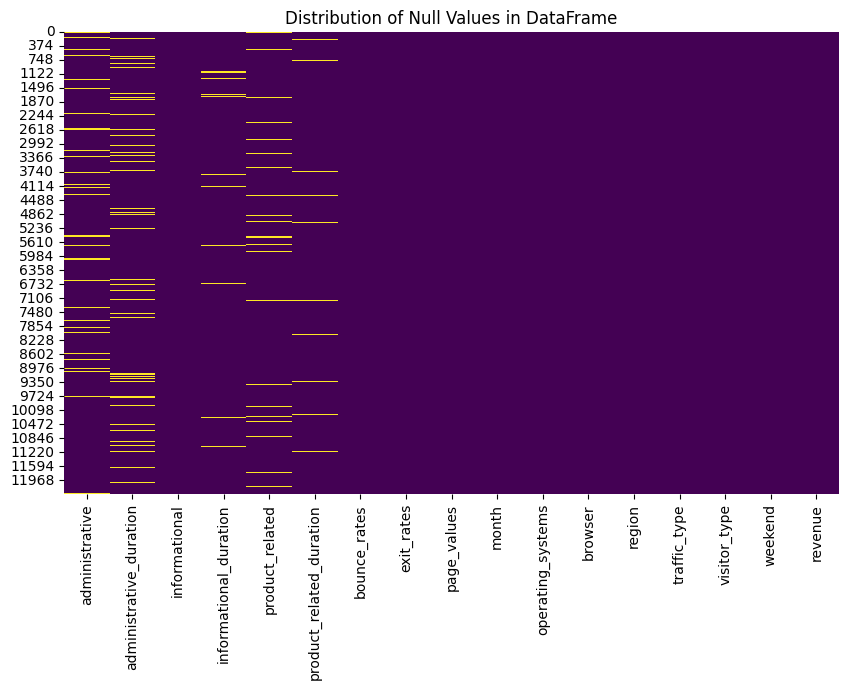

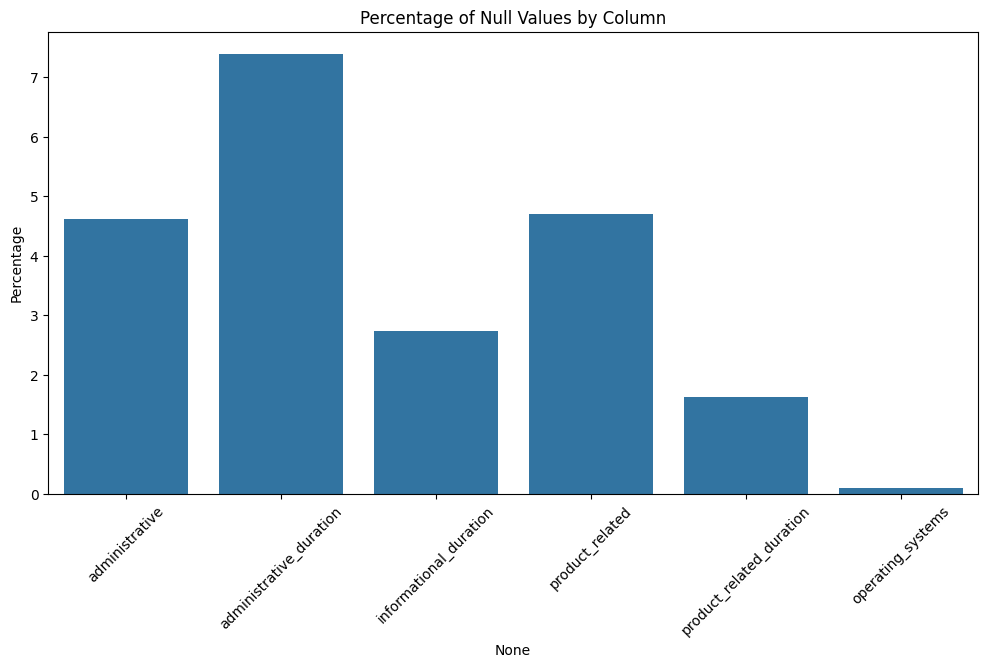

In [9]:
# Create an instance of the Plotter class
plotter = Plotter()

# Plot the distribution of null values before handling them
plotter.plot_null_distribution(df)
plotter.plot_null_percentage(df)


In [10]:
columns_remove_null = ['administrative', 'administrative_duration', 'product_related']
df = data_transformer.remove_null(columns_remove_null)
df = data_transformer.impute_null(['product_related_duration'], 'mean')
df = data_transformer.impute_null(['operating_systems'], 'mode')
df = data_transformer.impute_null(['informational_duration'], 'mean')

/home/msyislam/aicore/Exploratory-Data-Analysis---Online-Shopping-In-Retail/data_transformer.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df[column] = self.df[column].fillna(value)


Confirming the null values have been removed by plotting the null distribution. We expect it to return 0



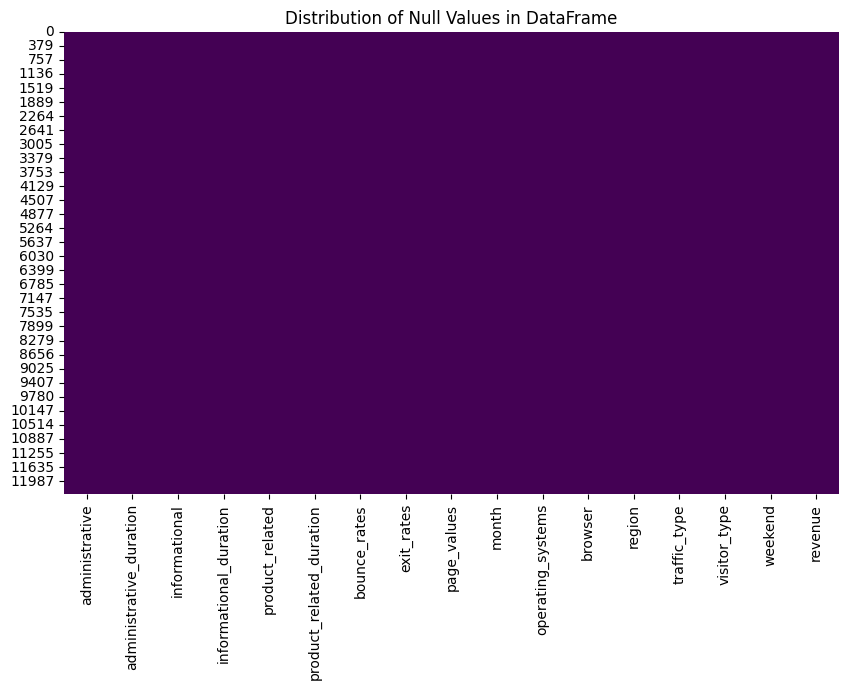

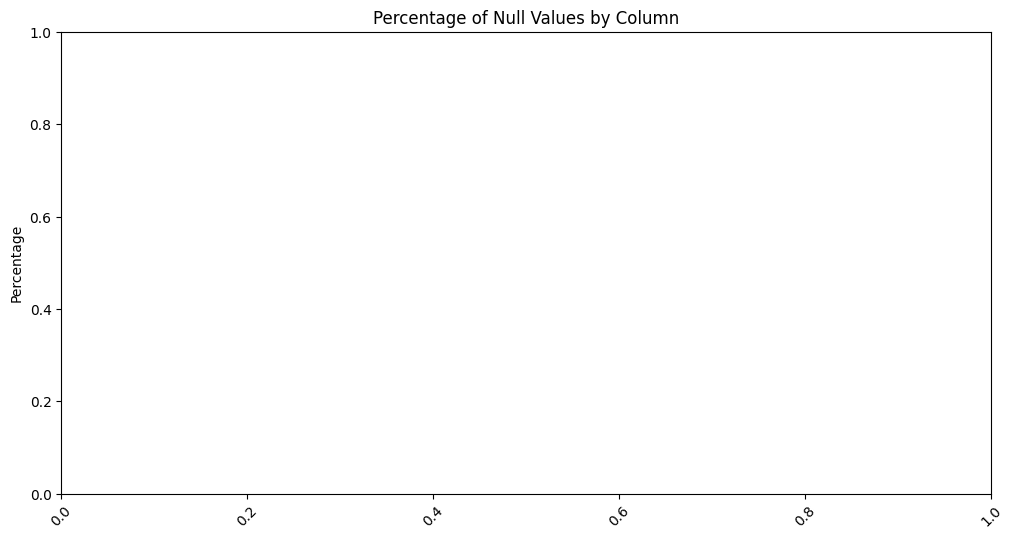

In [11]:

# Visualize the removal of NULL values
plotter.plot_null_distribution(df)
plotter.plot_null_percentage(df)


# Skewness

**Skewness** is a measure of the asymmetry of the probability distribution of a real-valued random variable about its mean. It quantifies how much a distribution deviates from a normal (Gaussian) distribution.

### Positive Skewness:

- When the skewness is greater than 0, the distribution is positively skewed.
- The right tail (higher values) is longer or fatter than the left.
- **Example**: Income distribution where a small number of people earn significantly higher than the average.

### Negative Skewness:

- When the skewness is less than 0, the distribution is negatively skewed.
- The left tail (lower values) is longer or fatter than the right.
- **Example**: Age at retirement where a small number of people retire much earlier than the average.

### Magnitude of Skewness:

- **Absolute skewness < |0.5|**: The data is fairly symmetrical.
- **Absolute skewness |0.5 - 1|**: Moderate skewness, often acceptable for many analyses.
- **Absolute skewness > |1|**: High skewness, likely requiring transformation or special handling.

### Calculation of Skewness

The skewness of a dataset is calculated using the formula:

$$
\text{Skewness} = \frac{n}{(n-1)(n-2)} \sum \left( \frac{x_i - \bar{x}}{s} \right)^3
$$

where:

- \( n \) is the number of data points.
- \( x_i \) is each individual data point.
- \( \bar{x} \) is the mean of the data.
- \( s \) is the standard deviation of the data.



### Reason to transform skewed data

Transforming skewed data is a common preprocessing step in data analysis and can be motivated by a variety of factors:

***Machine Learning:***
Untransformed skewed data might lead to one end of the distribution being disproportionately represented in the analysis. Some algorithms (e.g., K-nearest neighbors, SVM, or linear regression-based models) can be highly sensitive to the scale and distribution of data. Transforming the data can help these algorithms perform better by ensuring a more uniform representation of the data.

***Normalisation:***
Many statistical techniques (like linear regression, ANOVA, t-tests, etc.) assume that the data follows a normal distribution. If the data is skewed, these techniques may give biased or inefficient results. Transforming the data can help to make it more normally distributed, thus satisfying the assumptions of these techniques.

***Reduction of the Impact of Outliers:***
Skewed data often has outliers that can disproportionately affect the results of an analysis. By transforming the data, the impact of these outliers can be reduced.

***Improving Interpretability:***
In some cases, transforming the data can make results more interpretable. For example, a log transformation can convert multiplicative relationships into additive ones and exponential relationships into linear ones.


### Threshold
We will set a threshold > |1|. Any value above 1 or under -1 we will transform it.



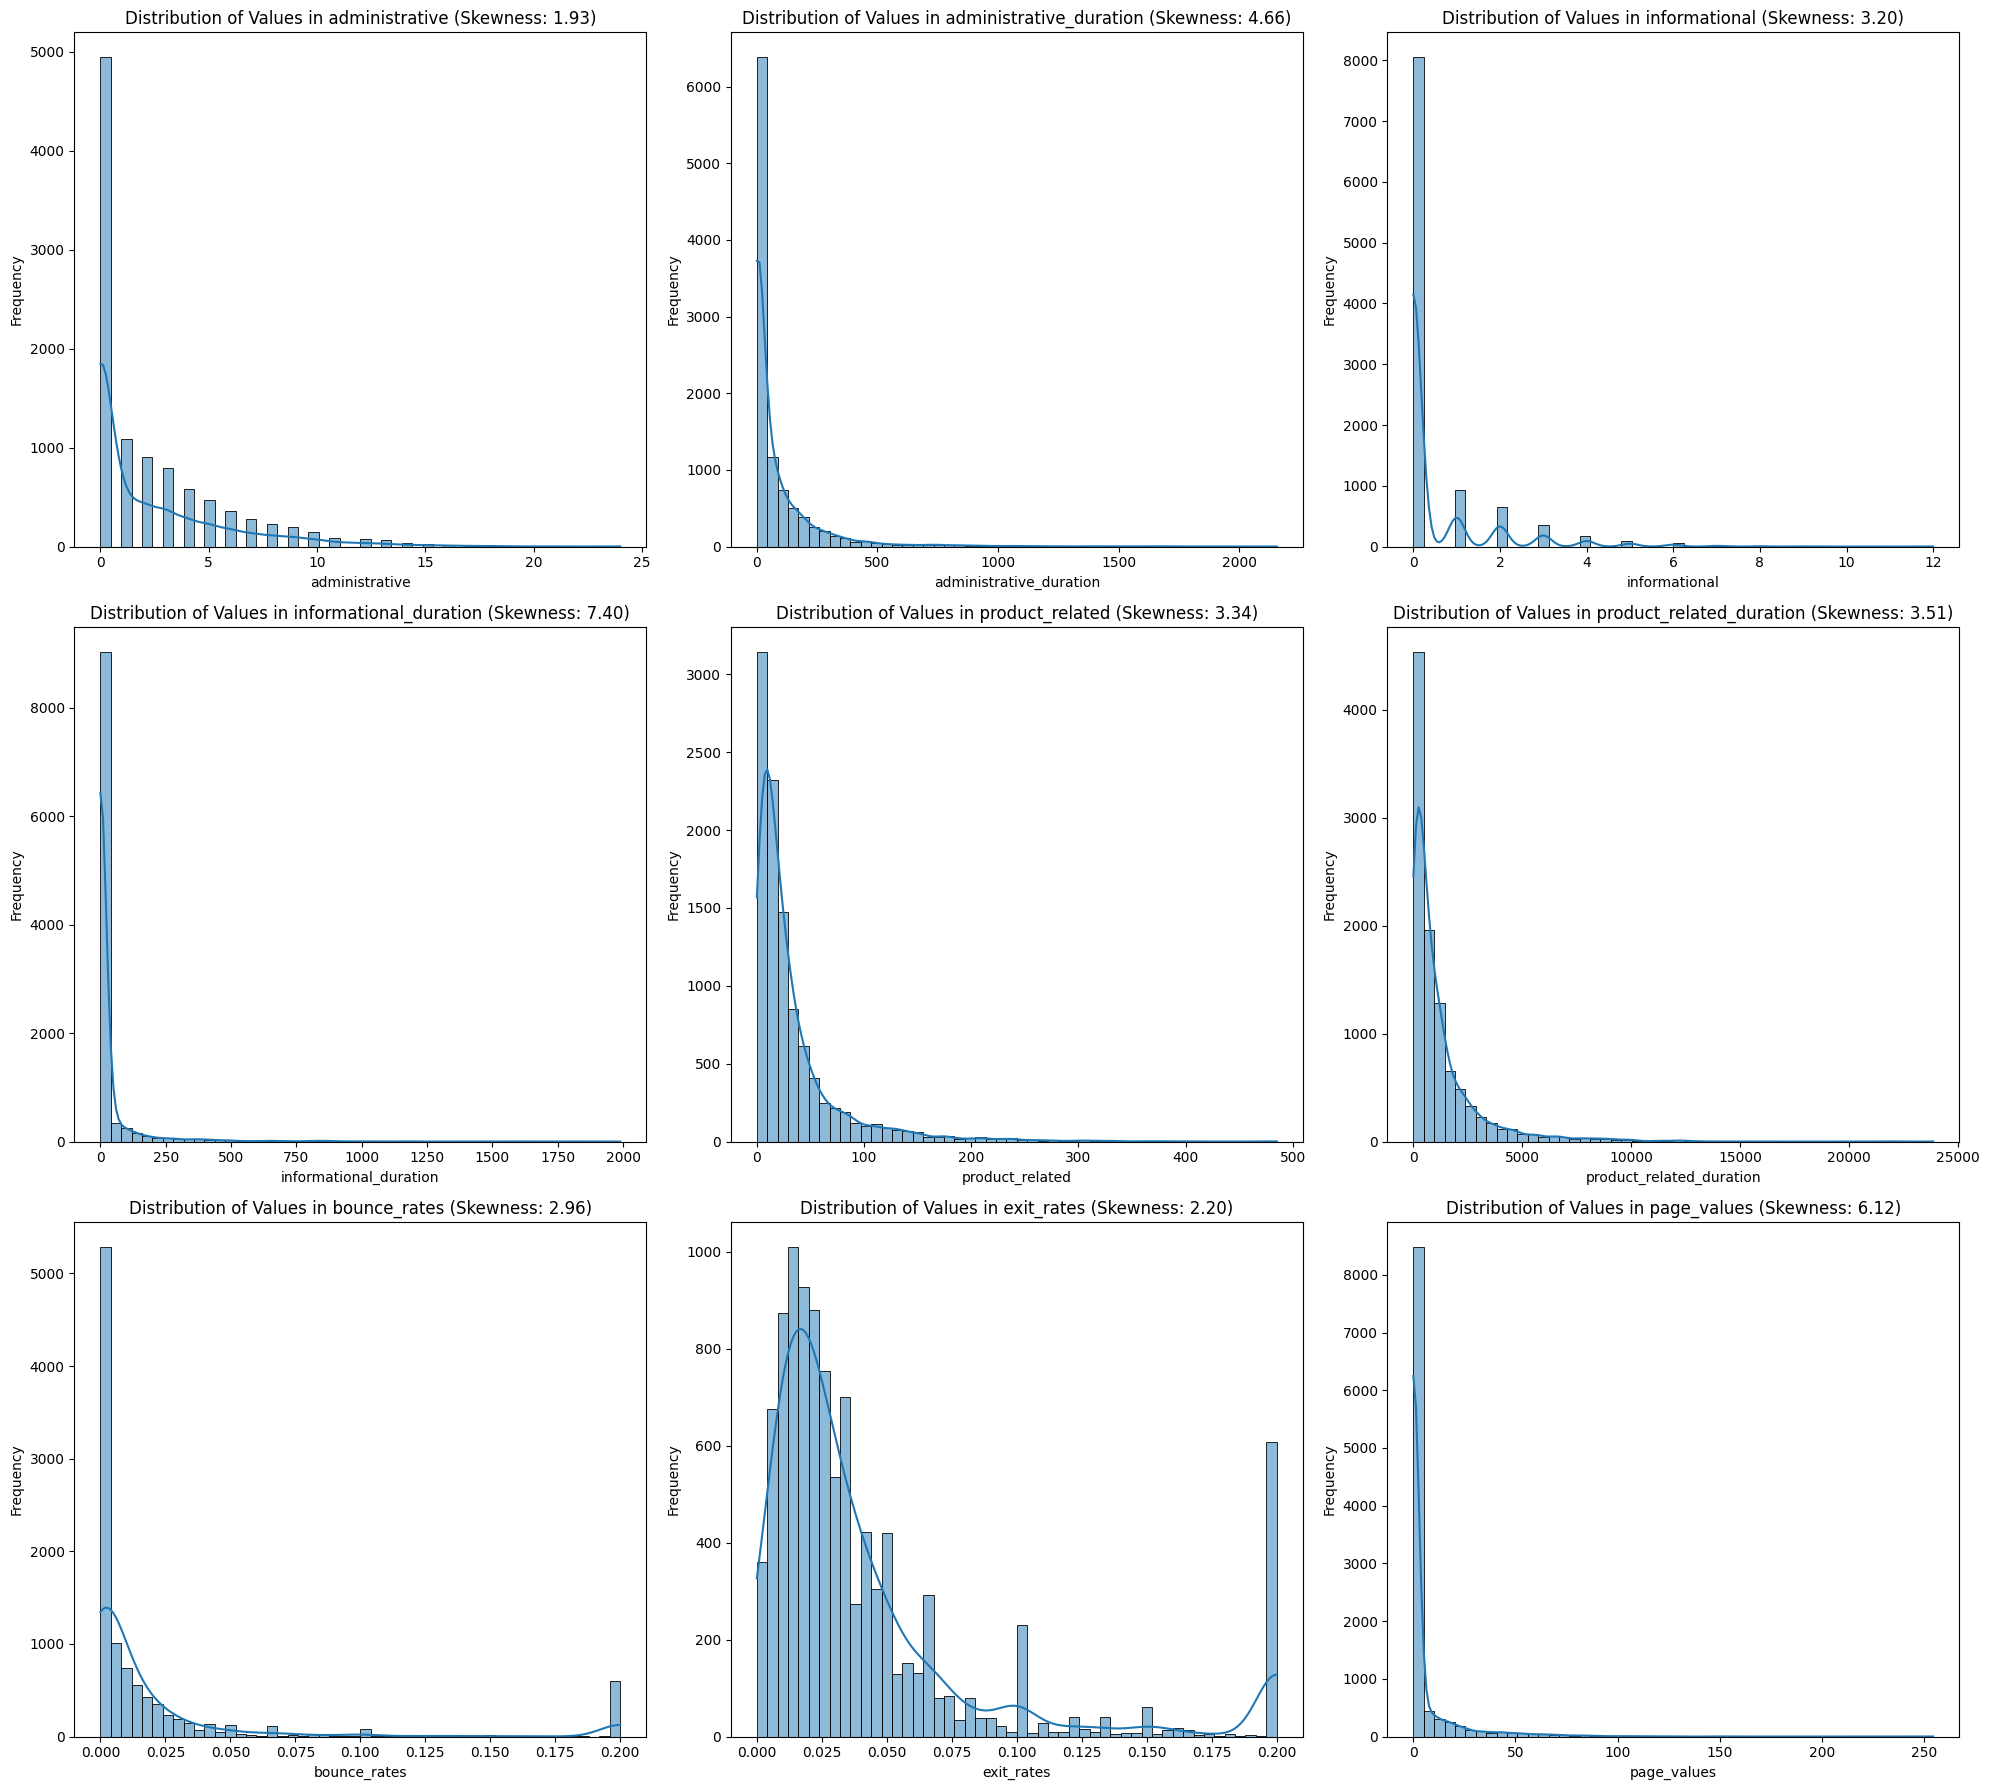

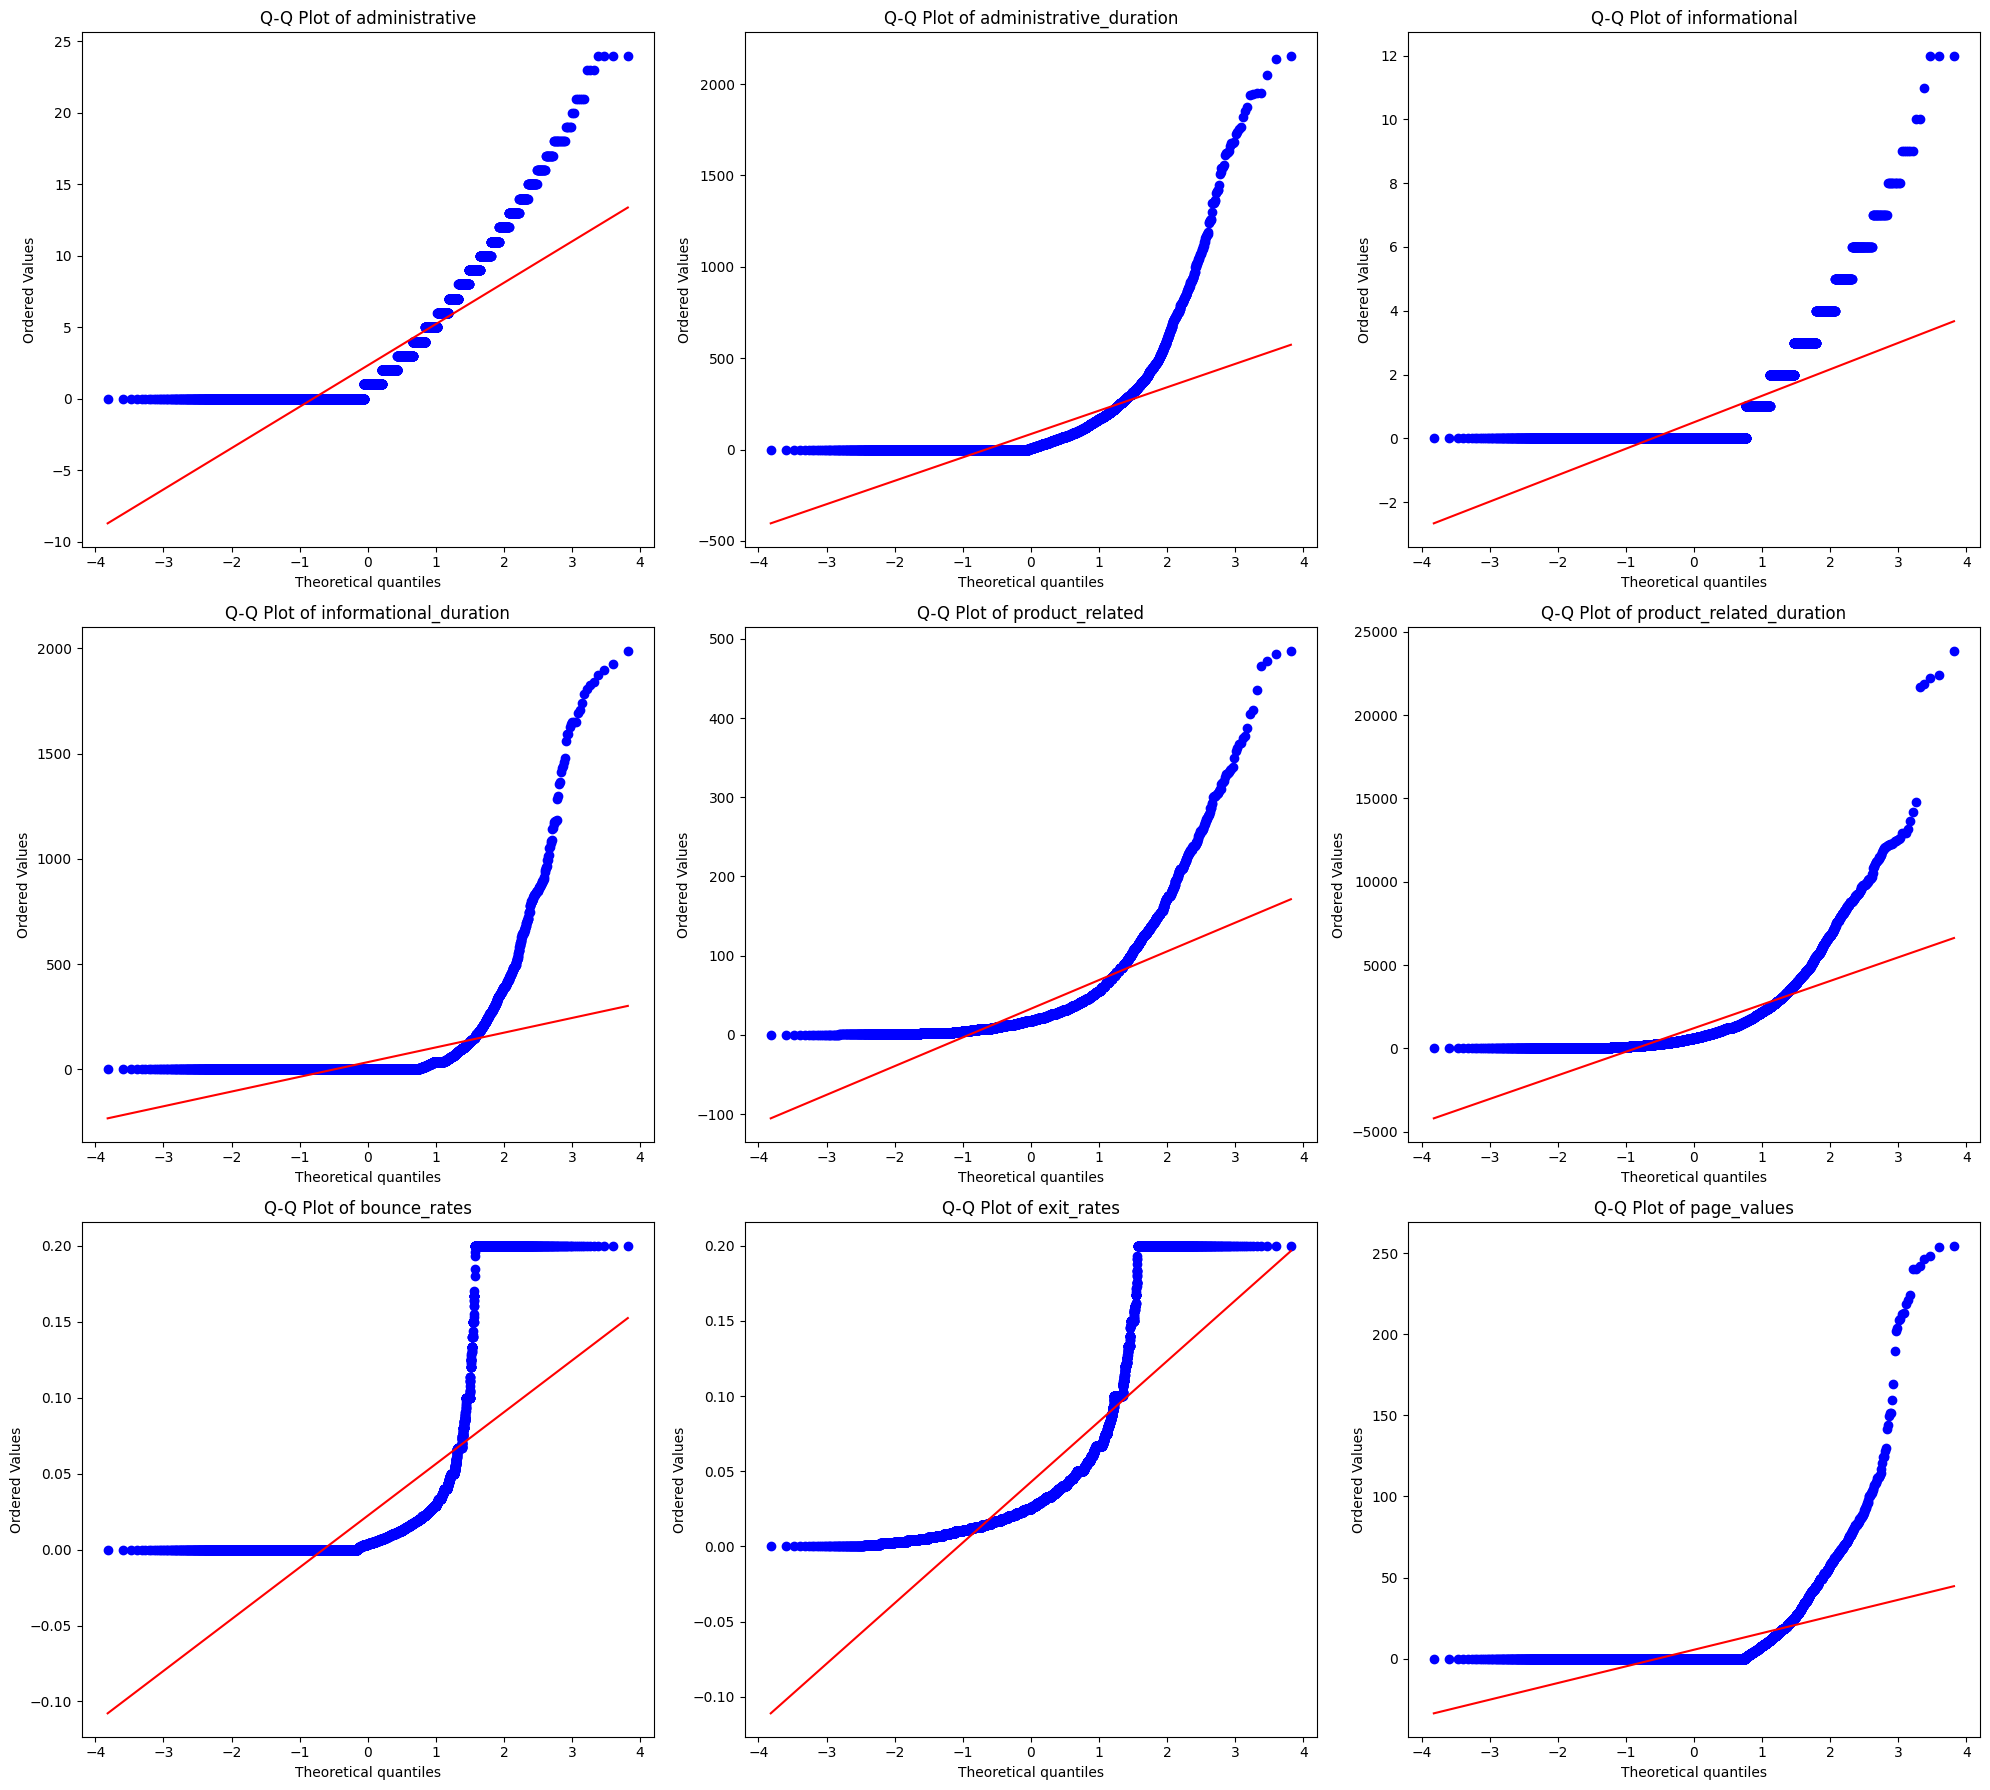

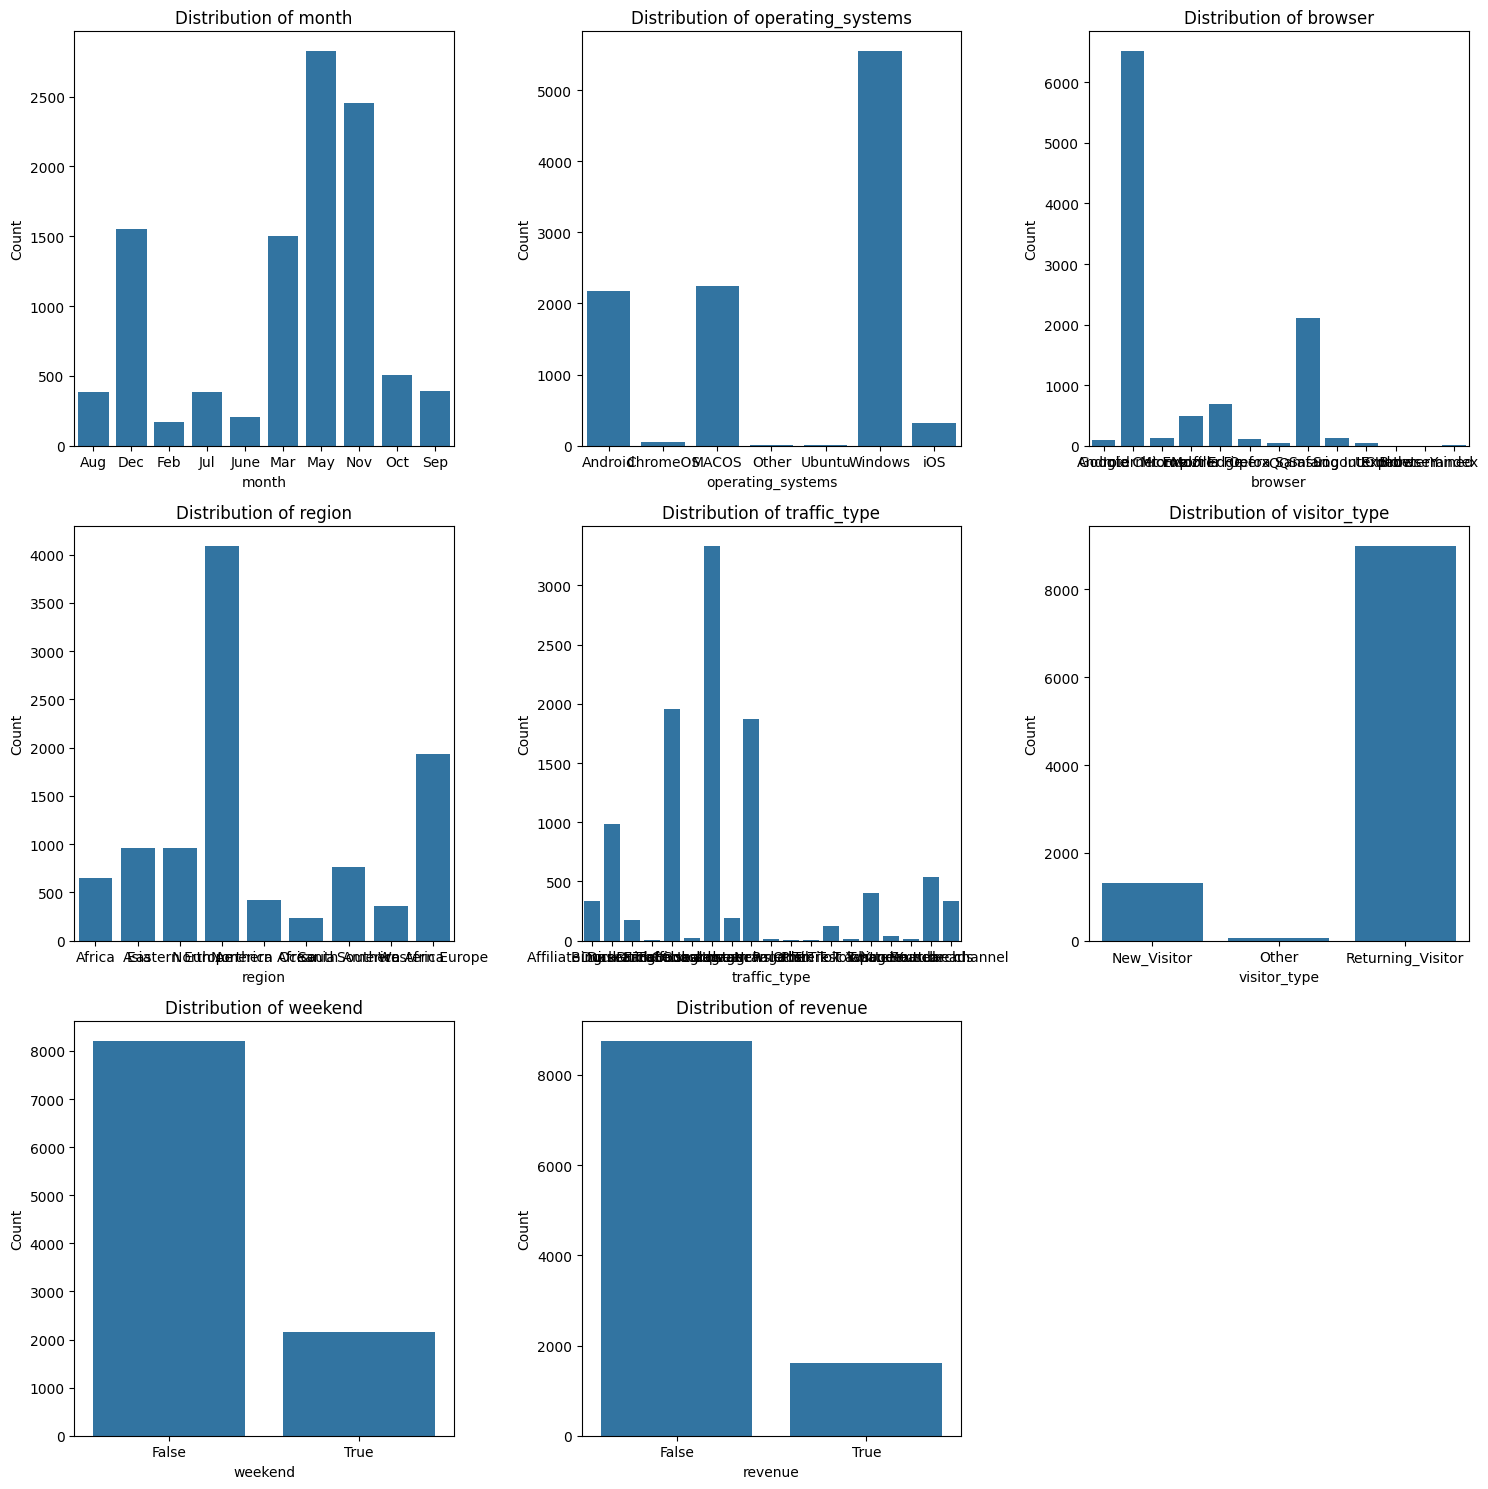

In [12]:
# Identifying the columns with the skewed data
selected_columns = df.select_dtypes(include=['float64', 'int64']).columns

plotter = Plotter()
plotter.plot_skewness(df, selected_columns)
plotter.plot_qq(df, selected_columns)
categorical_columns = ['month', 'operating_systems', 'browser', 'region', 'traffic_type', 'visitor_type', 'weekend', 'revenue']
plotter.plot_categorical_data(df, categorical_columns)

### Analysis of the skewness of the Columns

After visualizing the data we can see that every column has a significant positive skew. The reason for this can be attributed to the nature of the dataset itself:


- **Administrative Duration, Informational Duration, and Product-Related Duration:** These columns are highly skewed towards zero, as many users may not engage with these pages at all, resulting in zero durations. When users do engage, the durations can vary widely, leading to a long right tail.

- **Bounce Rates:** The skewness here indicates that most users either bounce quickly (close to zero) or do not bounce at all, with fewer intermediate values.

- **Exit Rates:** Similar to bounce rates, exit rates show a peak at lower values, suggesting that users either exit quickly or stay on the site for a longer time, with fewer mid-range values.

- **Page Values:** This metric, which quantifies the economic value of a page, is skewed due to a small number of pages having very high economic values, while most pages have lower values.

Overall, these patterns are consistent with user behavior on websites, where a large proportion of actions are concentrated in a few high or low values, resulting in positively skewed distributions.


#### Transformations to Address Skewness

To address the skewness in these columns, we will apply a combination of log and Box-Cox transformation. These transformations help to make the data more normally distributed, which can improve the performance of machine learning models and the accuracy of statistical analyses.

#### Log Transformation
The log transformation is defined as:
```scsss
y = log(x)
```
#### Box-Cox Transformation
The Box-Cox transformation is defined as:

```scss
y = (x**λ - 1) / λ,  for λ ≠ 0
y = log(x), for λ = 0
```

#### Yeo-Johnson transform
It is defined as follows:
```scss
For y ≥ 0 and λ ≠ 0: ((y^(λ) - 1) / λ)
For y ≥ 0 and λ = 0: log(y)
For y < 0 and λ ≠ 2: -((-y^(2-λ) - 1) / (2 - λ))
For y < 0 and λ = 2: -log(-y)
```
These transformations will help stabilize variance, reduce the impact of outliers, and improve the interpretability of our data.


In [13]:
data_transformer = DataTransformer(df)
skewed_columns = df.select_dtypes(include=['float64', 'int64']).columns
df = data_transformer.transform_skewed_columns(skewed_columns, 'yeo-johnson')


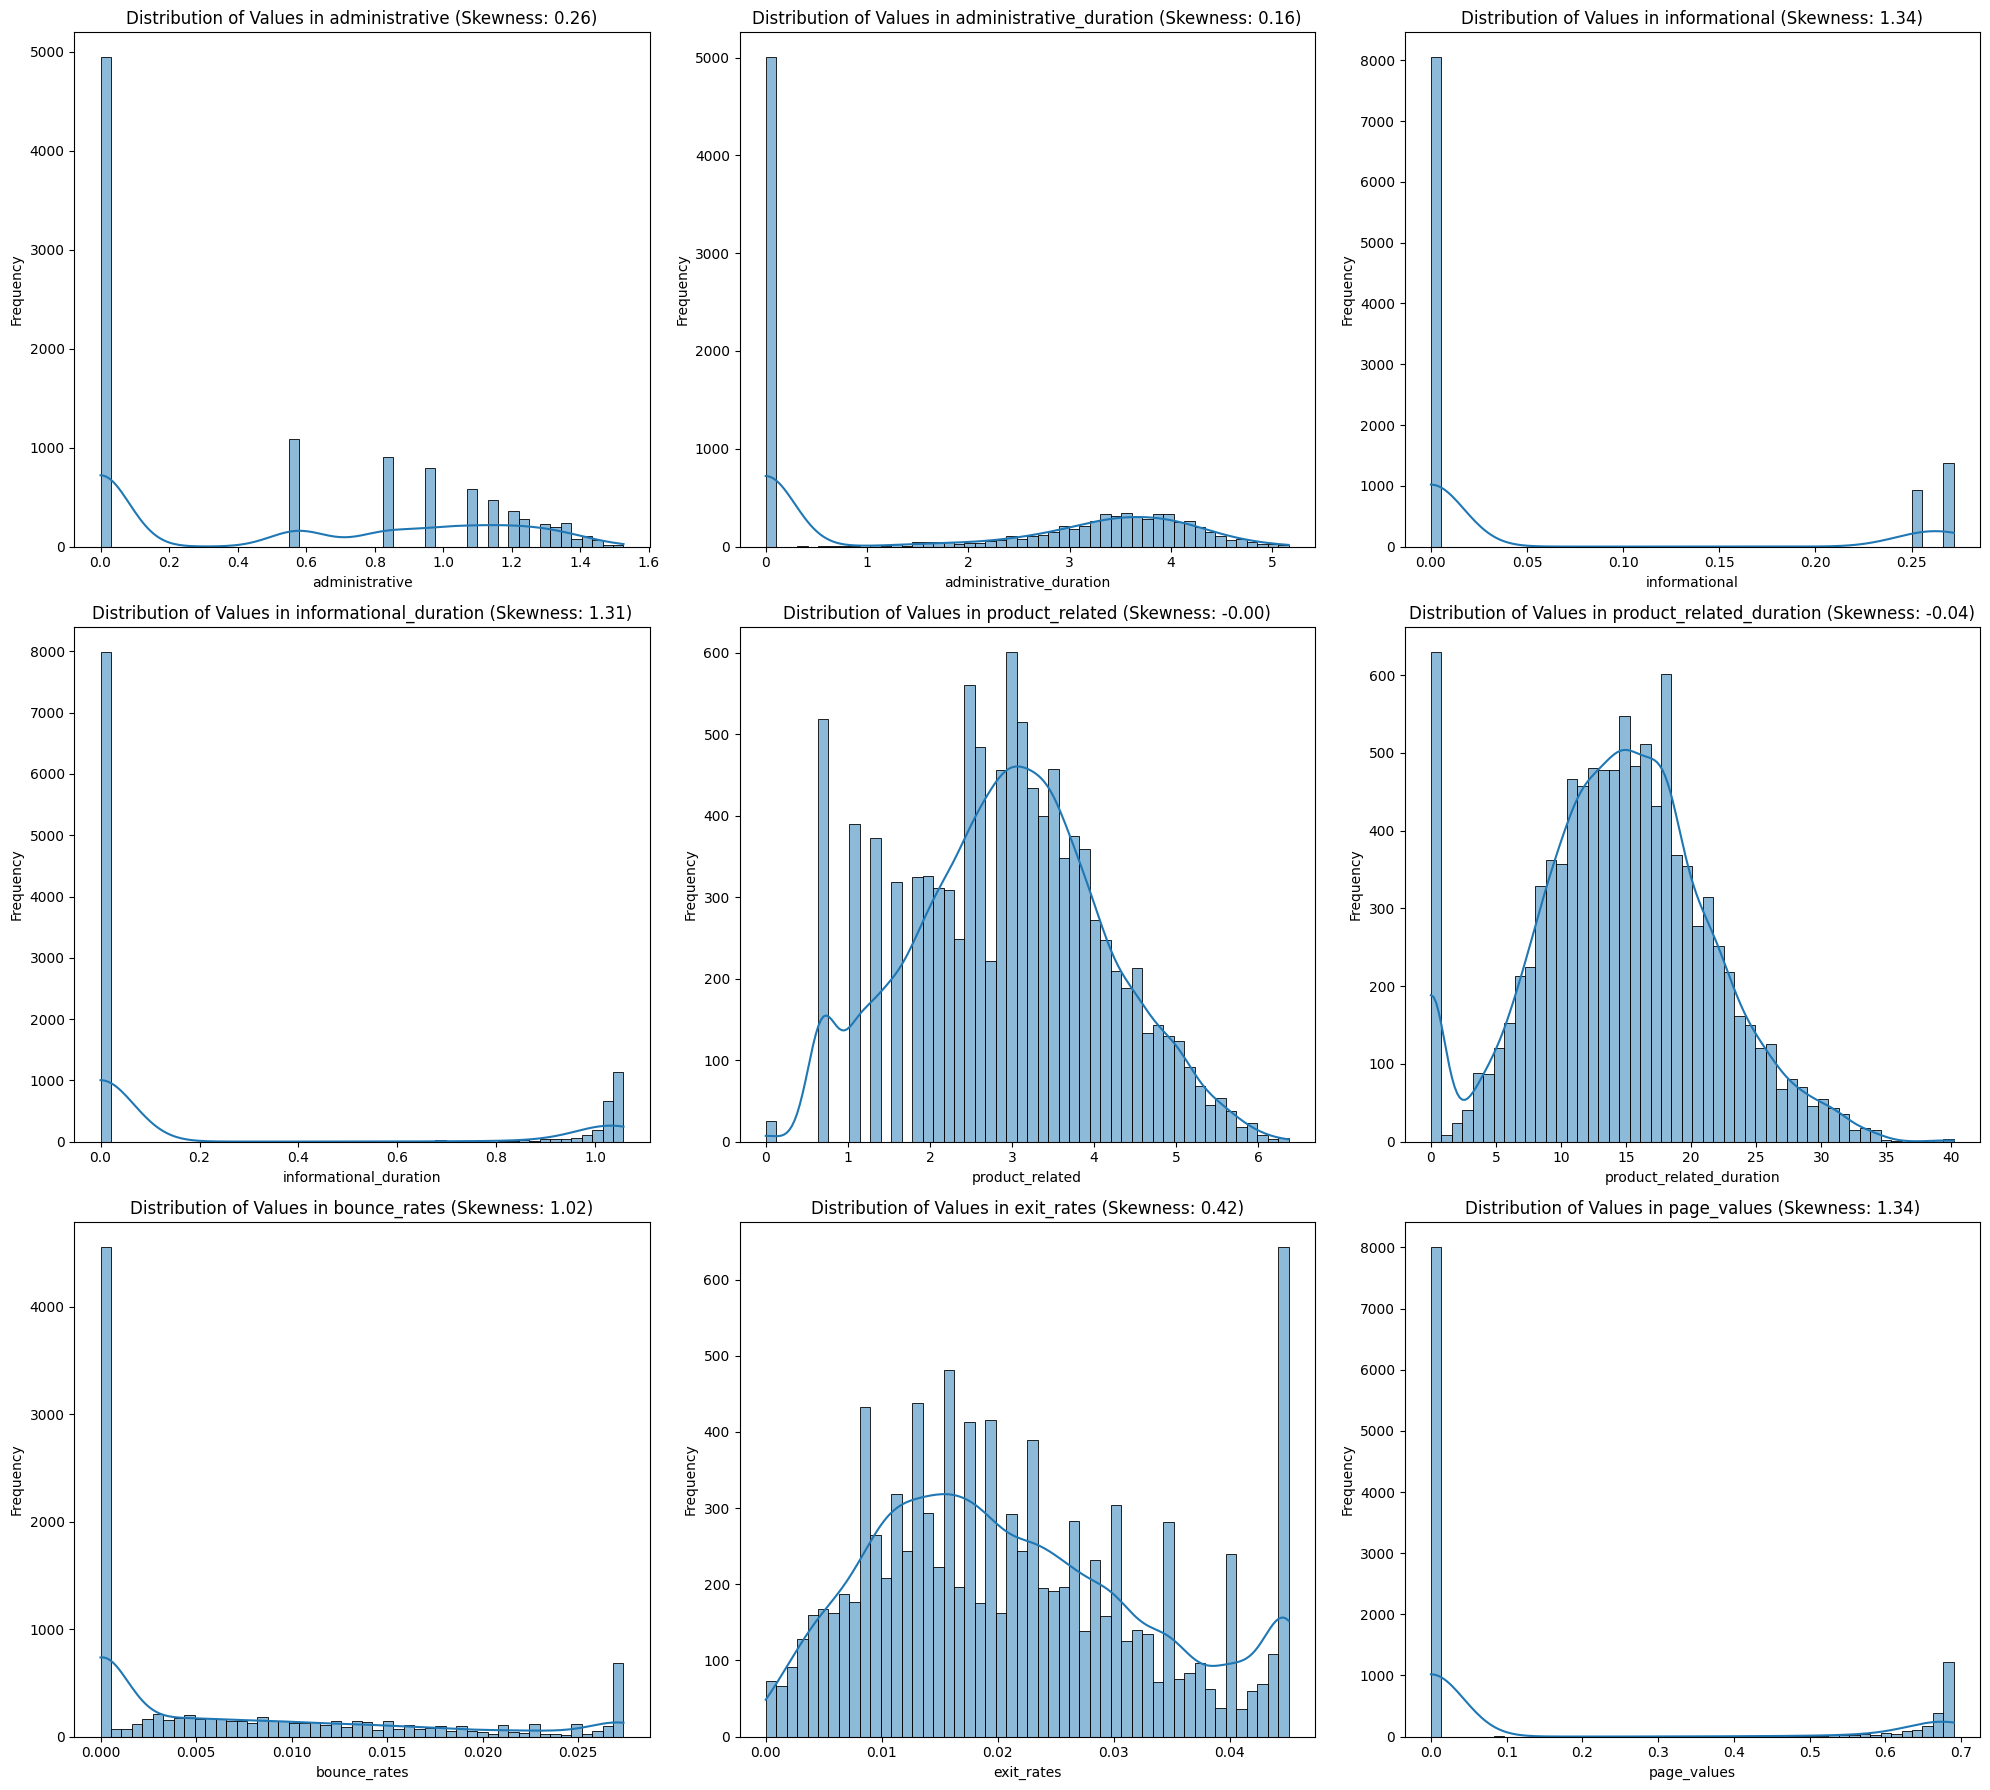

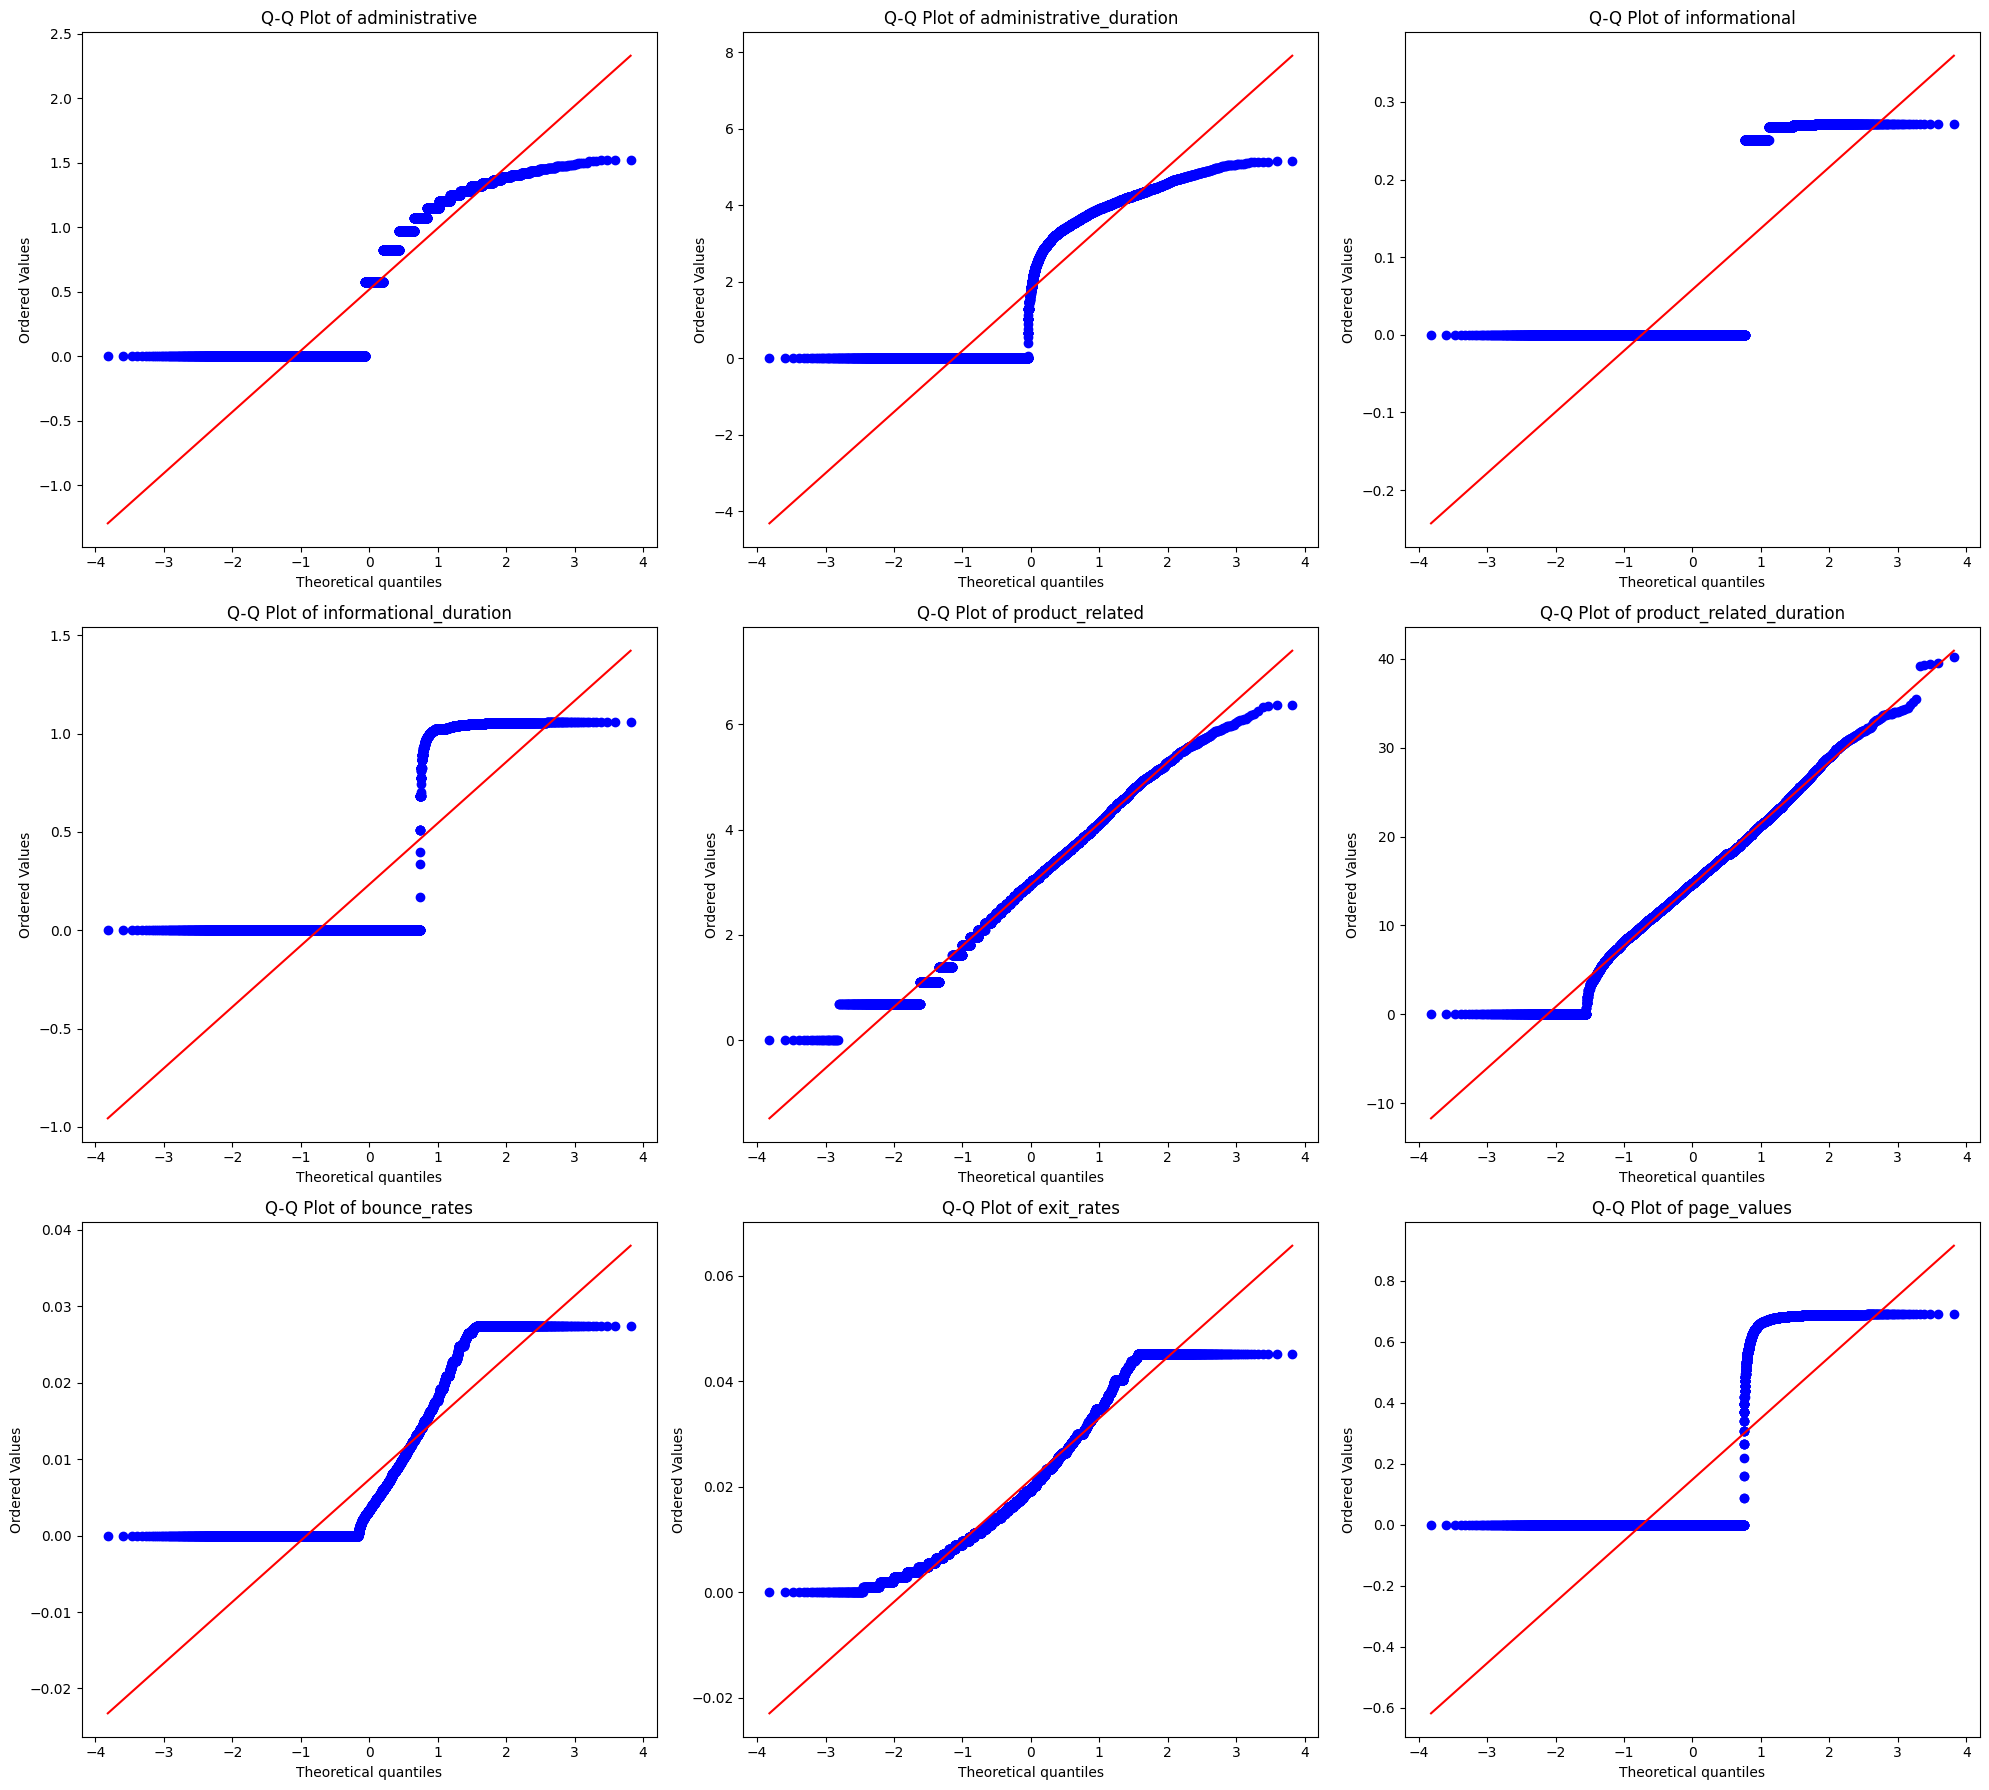

In [14]:
# Analysing skewness after transformation has been applied
selected_columns = df.select_dtypes(include=['float64', 'int64']).columns
plotter.plot_skewness(df, selected_columns)
plotter.plot_qq(df, selected_columns)

### Outliers

Outliers are data points that significantly differ from the rest of the dataset. They can have a substantial impact on statistical analyses and machine learning models, leading to biased results or misinterpretations.

#### Causes of Outliers

- **Measurement Errors**: Inaccuracies in data collection or recording can result in outliers.
- **Data Entry Errors**: Typographical mistakes during data entry can produce anomalous values.
- **Natural Variation**: Some outliers occur naturally due to the inherent variability in the data.
- **Experimental Errors**: Mistakes during the experiment or data gathering process.
- **Sampling Errors**: Improper or biased sampling methods can lead to outliers.
- **Special Causes**: Unique, one-time events that are different from the usual data pattern.

#### Identifying Outliers

Outliers can be identified using various methods, including:

- **Statistical Methods**: Using measures like z-scores or the interquartile range (IQR) to identify data points that lie beyond a certain threshold.
- **Visualization**: Graphical methods such as boxplots or scatter plots can visually reveal outliers.
- **Machine Learning**: Algorithms like isolation forests or clustering techniques can detect outliers in large datasets.

#### Handling Outliers

There are several ways to handle outliers, depending on the context and the impact they have on the analysis:

- **Removal**: Outliers that result from errors or do not hold any significant value can be removed from the dataset.
- **Transformation**: Applying transformations (e.g., log, square root) to reduce the effect of outliers.
- **Imputation**: Replacing outliers with a measure of central tendency (mean, median) or using interpolation methods.
- **Capping**: Limiting the values of outliers to a certain threshold.
- **Analysis with Robust Methods**: Using statistical methods and models that are less sensitive to outliers.


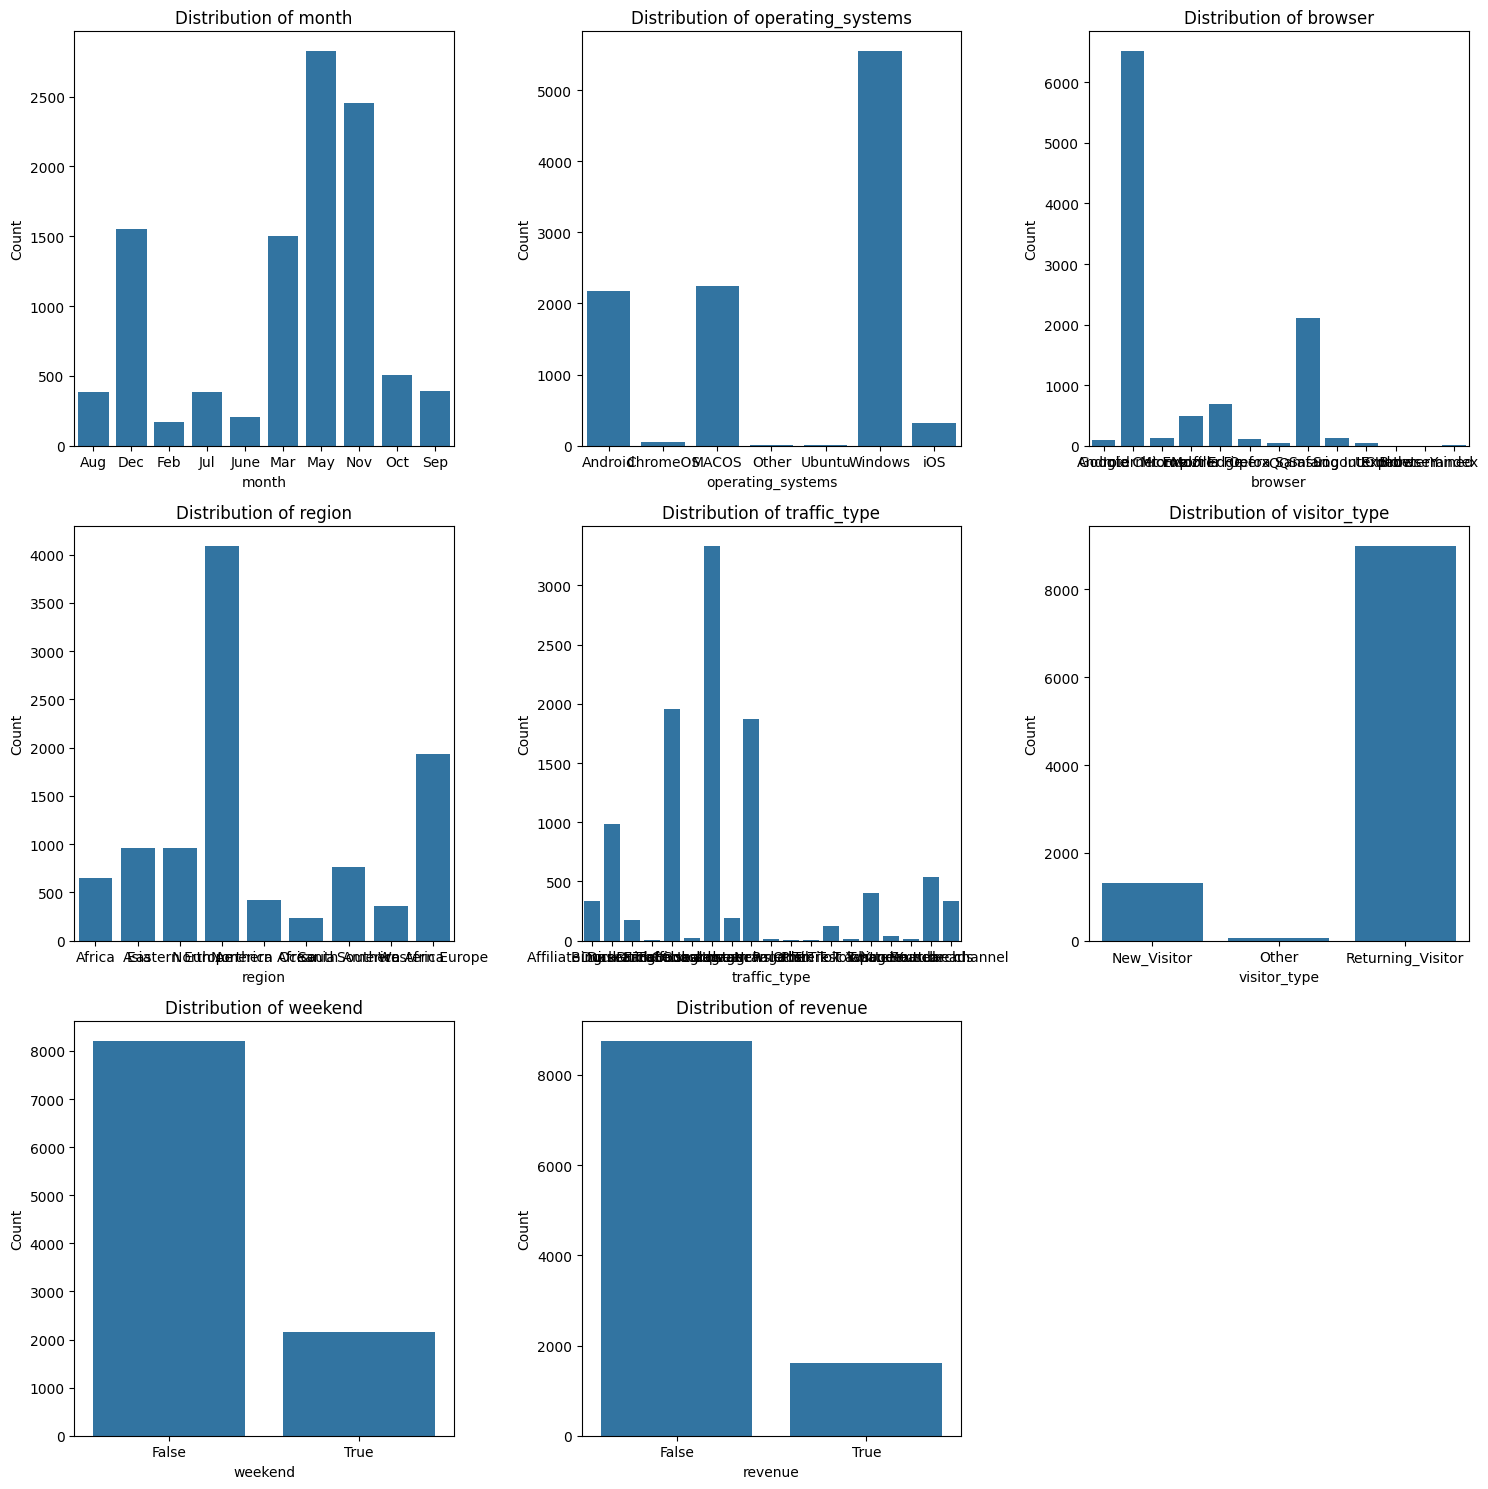

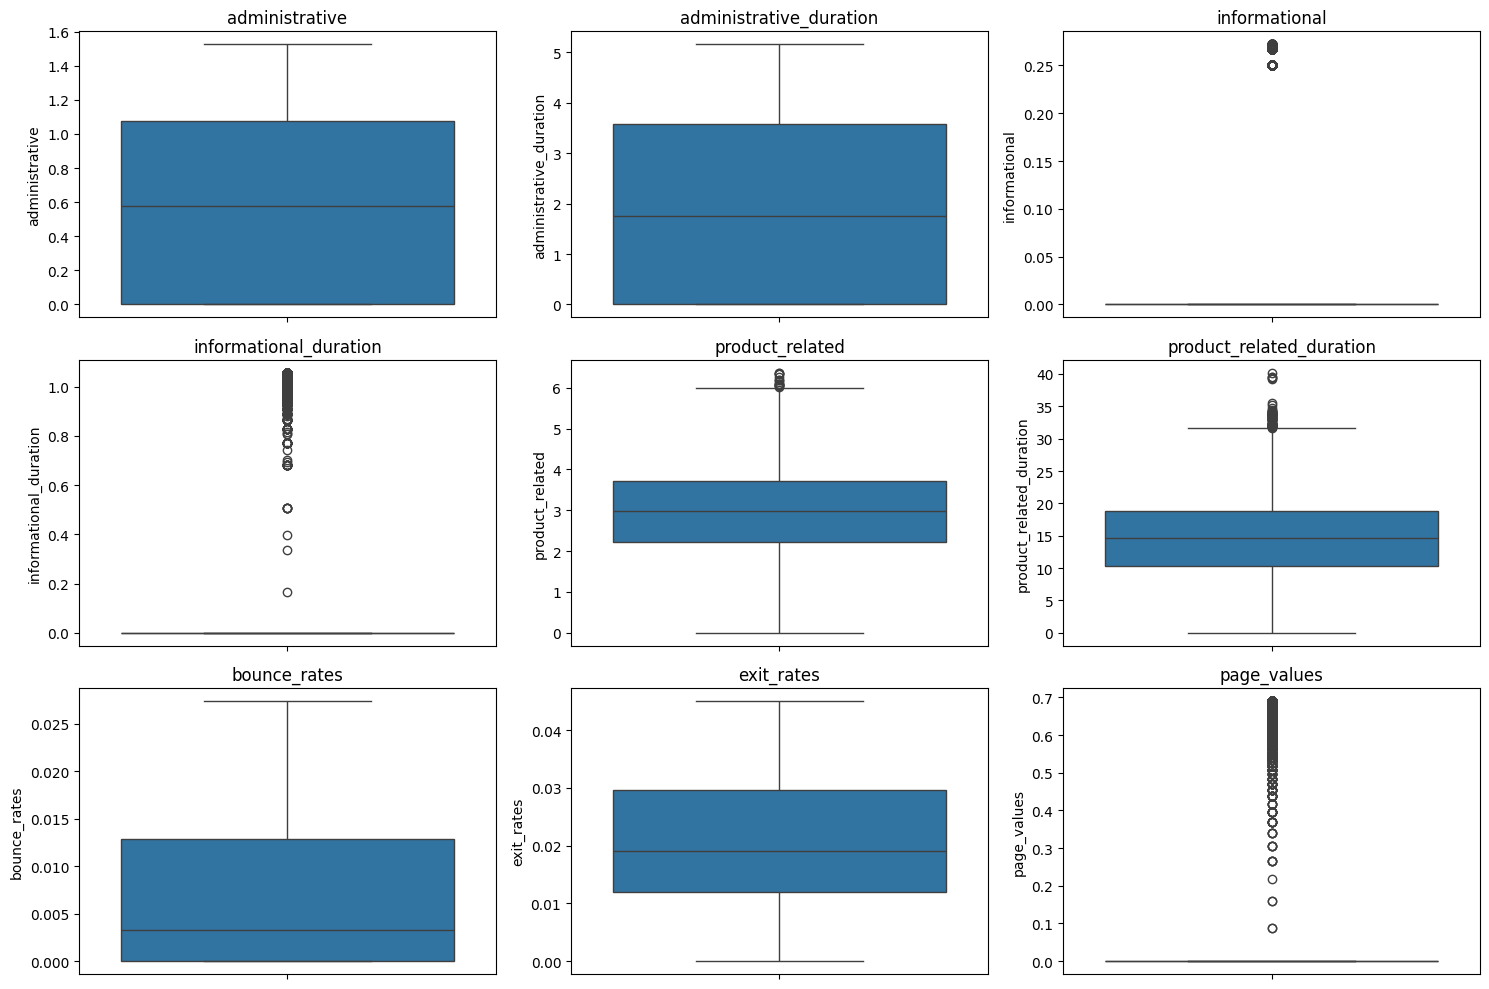

In [15]:
categorical_columns = ['month', 'operating_systems', 'browser', 'region', 'traffic_type', 'visitor_type', 'weekend', 'revenue']
plotter.plot_categorical_data(df, categorical_columns)

# List of columns to create boxplots for
selected_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Plot the boxplots
plotter.plot_boxplots(df, selected_columns, 3)

### Analysis of Outliers in the Dataset

Upon analyzing the box plots and the distribution of the original data, there doesn't seem to be any significant reason to assume we have outliers that warrant removal. Here’s a detailed explanation for each of the columns:

- **Administrative, Informational, and Product-Related Durations**: These columns show some extreme values, but these are expected due to the varied engagement of users with different pages. Some users may spend an extensive amount of time on certain pages, leading to high duration values.

- **Bounce Rates and Exit Rates**: The distribution for these columns is characterized by peaks at 0 and at higher values. This is a typical pattern for web traffic data, where users either leave the site immediately (resulting in low bounce or exit rates) or spend significant time on the site before exiting.

- **Page Values**: This column shows a skew towards higher values for a small number of pages. These high values represent pages with significant economic impact, which are expected in the context of web analytics.

#### Key Points:

- **Expected Behavior**: The observed distributions align with typical user behavior on websites. High values or peaks in these distributions are indicative of genuine user interactions rather than errors or anomalies in the data.

- **Decision Not to Remove Values**: Given the nature of the dataset, the presence of high values or peaks is not indicative of outliers that should be removed. These values provide valuable insights into user behavior and site performance.

Overall, the data's distribution and patterns reflect expected user interactions with the website. Removing these values would result in a loss of important information that is crucial for understanding and analyzing user behavior.


### Handling Overly Correlated Columns

#### Collinearity

At a high level, *collinearity* occurs when two independent variables are heavily related to each other - to the point where one of the independent variables can be predicted from the others with a very high degree of accuracy. The term *multicollinearity* refers to a similar situation, but pertaining to a group of more than two variables.

#### Issues with Collinearity

Collinearity can pose several problems in statistical modeling and machine learning:

- **Redundancy**: When variables are highly correlated, they provide redundant information. This redundancy can inflate the variance of coefficient estimates and make the model unstable.
- **Interpretation**: High collinearity makes it difficult to determine the individual effect of each predictor on the response variable. Coefficients may change erratically in response to small changes in the model or the data.
- **Model Performance**: Although the overall fit of the model might not be severely affected, collinearity can lead to overfitting and reduce the model's ability to generalize to new data.

#### Identifying Collinear Variables

To identify collinear variables, we can use a correlation matrix or a correlation heatmap. These tools allow us to visualize the pairwise correlations between variables. A high correlation coefficient (close to 1 or -1) indicates collinearity.

#### Threshold for Collinearity

While there is no strict rule for how much correlation is too much, a common rule of thumb is to consider correlations above 0.9 as problematic. Some practitioners might use a threshold of 0.95. However, the appropriate threshold can depend on the specific context and requirements of the analysis.

#### Steps to handle Collinearity

1. **Compute the Correlation Matrix and Visualize It**:
This will give us a table showing the pairwise correlation coefficients between all the features in the dataset.
We will then use a heatmap to visualize the correlation matrix. This makes it easier to see which features are highly correlated.
2. **Identify Highly Correlated Columns**:
Decide on a threshold above which you will consider the features to be highly correlated - for our case it will be 0.85
And look for pairs of features where the absolute value of the correlation coefficient is above the threshold.
3. **Remove or Combine the columns**:
For each pair of highly correlated features, decide which one to remove or combine. This decision will be based on domain knowledge, the importance of features to our model.


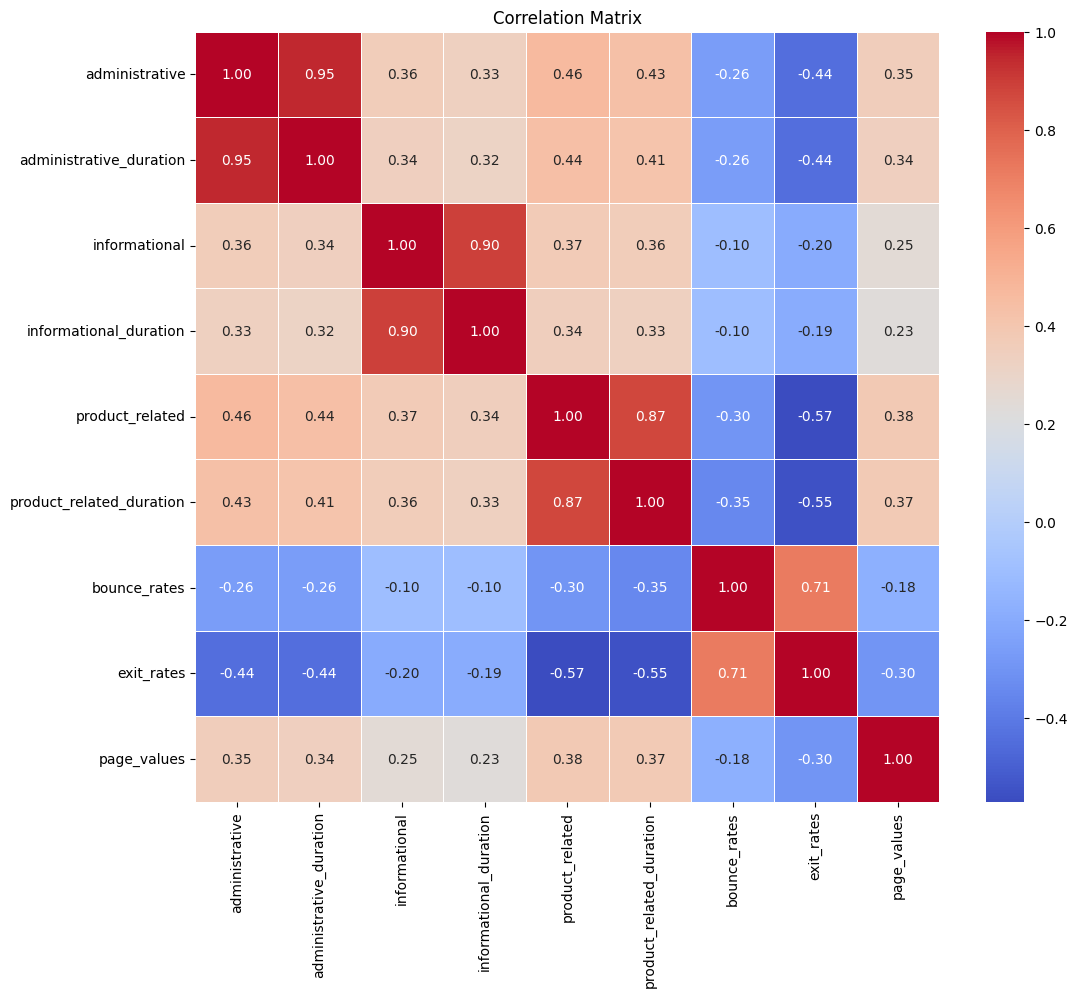

In [16]:
# Compute the correlation matrix
selected_columns = df.select_dtypes(include=['float64', 'int64']).columns

correlation_matrix = df[selected_columns].corr()


plotter.correlation_matrix(df[selected_columns])


#### Columns to Drop and Reasons:

From our matrix we can see that the following columns are highly correlated:

- **administrative and administrative_duration** with a correlation of 0.95
- **informational and informational_duration** with a correlation of 0.90
- **product_related and product_related_duration** with a correlation of 0.87

To simplify our dataset and reduce multicollinearity, we will drop one feature from each pair of highly correlated features. This approach retains the essential information while making our dataset more manageable.

- **`administrative`**: Dropped in favor of `administrative_duration` because the duration spent on pages provides a more detailed measure of user engagement.
- **`informational`**: Dropped in favor of `informational_duration` for the same reason as above.
- **`product_related`**: Dropped in favor of `product_related_duration` to maintain consistency and capture more nuanced engagement data.

By dropping these columns, we aim to streamline our dataset, making it easier to work with while preserving the core information.


In [17]:
# Columns to drop based on high correlation
columns_to_drop = [
    'administrative',  # Drop in favor of 'administrative'
    'informational',   # Drop in favor of 'informational'
    'product_related'  # Drop in favor of 'product_related'
]

# Drop the specified columns
df = df.drop(columns=columns_to_drop)

# Display the reduced DataFrame
print(df.head())


   administrative_duration  informational_duration  product_related_duration  \
0                 0.000000                     0.0                  0.000000   
1                 0.000000                     0.0                 16.407165   
2                 3.605623                     0.0                 12.644751   
3                 0.000000                     0.0                 18.900939   
4                 0.000000                     0.0                 15.321172   

   bounce_rates  exit_rates  page_values month operating_systems  \
0      0.027379    0.045065      0.00000   May           Android   
1      0.000000    0.019664      0.00000   Nov           Windows   
2      0.020766    0.030699      0.00000   Sep           Windows   
3      0.016197    0.020755      0.53516   Dec           Windows   
4      0.010964    0.022796      0.00000   May           Android   

         browser          region   traffic_type       visitor_type  weekend  \
0  Google Chrome   North Americ

## Analysis And Visualisation

With the data cleaning process complete, we can now proceed to extract valuable insights. Our analysis will cover the following areas:

**I.** Customer sales behaviour

**II.** Types of software used by customers

**III.** Effectiveness of advertisements and traffic sources in generating revenue

**IV.** Revenue generation, particularly by returning and new visitors



### Customer behaviour


In [18]:
# Proportion of sales in the weekday vs weekend
weekend_proportion = df['weekend'].mean() * 100
weekday_proportion = 100 - weekend_proportion
print(f"Proportion of sales made on the weekend: {weekend_proportion:.2f} %")
print(f"Proportion of sales made on the weekday: {(weekday_proportion):.2f} %")

Proportion of sales made on the weekend: 20.86 %
Proportion of sales made on the weekday: 79.14 %


/tmp/ipykernel_323698/985996447.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  region_sales = df.groupby('region')['revenue'].sum()
/home/msyislam/aicore/Exploratory-Data-Analysis---Online-Shopping-In-Retail/plotter.py:274: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df.index, y=df.values, palette="viridis")


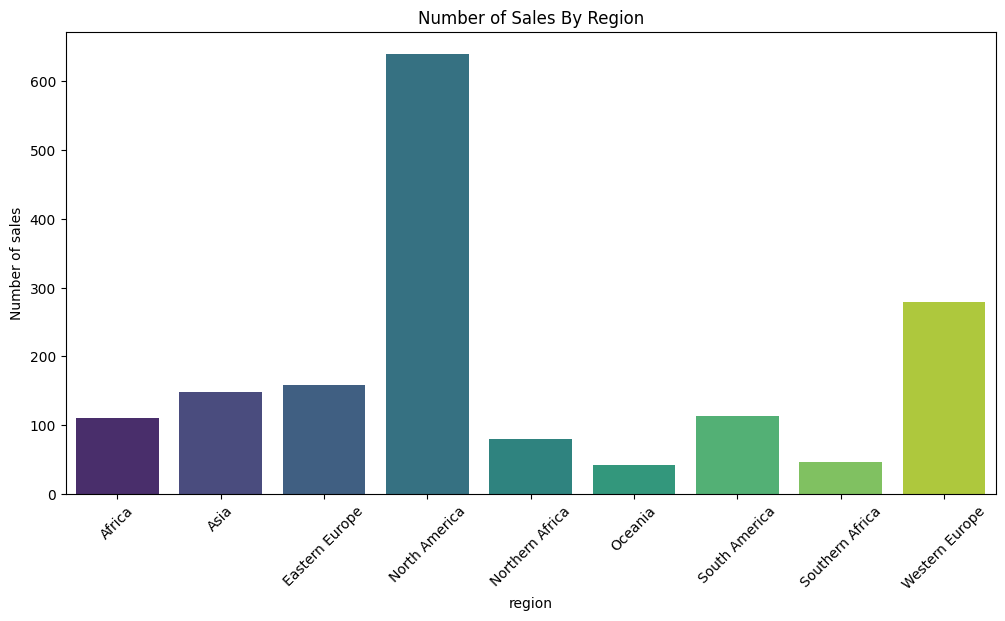

In [19]:
# Which regions generate the most sales

# Group by the 'region' column and sum the 'revenue' column
region_sales = df.groupby('region')['revenue'].sum()

# Sort the result in descending order
region_sales = region_sales.sort_values(ascending=False)

plotter.plot_bar_chart(region_sales, 'Number of Sales By Region', 'region', 'Number of sales')


/tmp/ipykernel_323698/872937321.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  website_traffic_sales = df.groupby('traffic_type')['revenue'].sum()


traffic_type
Google search          732
Facebook ads           225
Instagram ads          151
Bing search            144
Youtube channel         79
Affiliate marketing     68
Twitter                 55
Youtube ads             46
Instagram Page          43
Tik Tok ads             31
Direct Traffic          23
Facebook page           10
Yahoo Search             4
Newsletter               3
Other                    2
Pinterest                1
Tik Tok page             1
Yandex search            1
DuckDuckGo search        0
Name: revenue, dtype: int64


/home/msyislam/aicore/Exploratory-Data-Analysis---Online-Shopping-In-Retail/plotter.py:274: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df.index, y=df.values, palette="viridis")


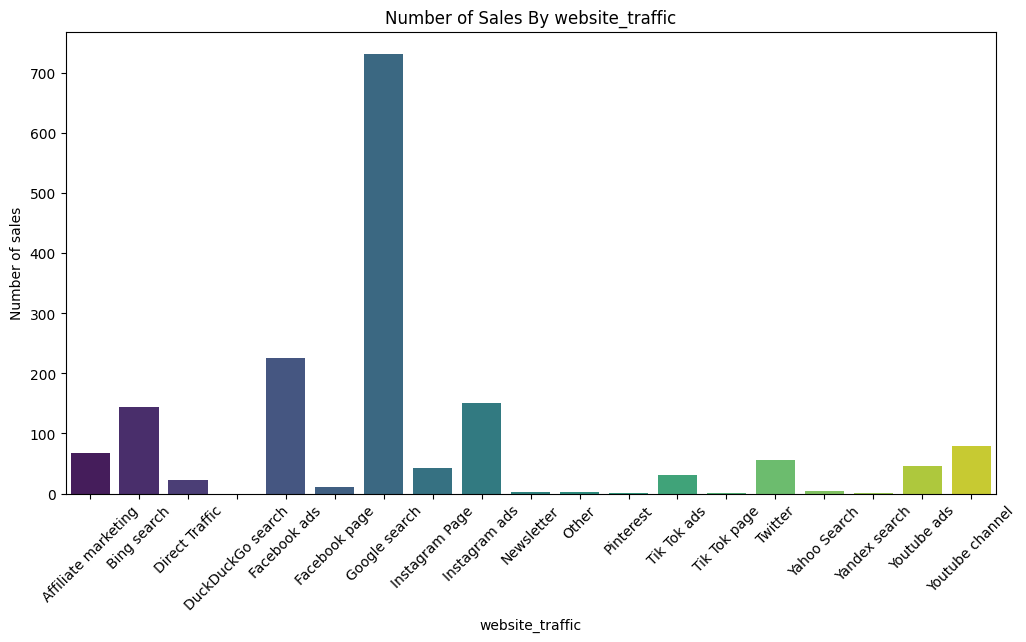

In [20]:
# Analysisng website traffic that is effective in generating sales

website_traffic_sales = df.groupby('traffic_type')['revenue'].sum()

website_traffic_sales = website_traffic_sales.sort_values(ascending=False)
print(website_traffic_sales)
plotter.plot_bar_chart(website_traffic_sales, 'Number of Sales By website_traffic', 'website_traffic', 'Number of sales')


In [21]:
# Percentage of time users spend on adminstrative, product pages and information pages**

# Sum the durations for each task type
total_administrative_duration = df['administrative_duration'].sum()
total_informational_duration = df['informational_duration'].sum()
total_product_related_duration = df['product_related_duration'].sum()

# Calculate the total time spent on the website
total_time_spent = total_administrative_duration + total_informational_duration + total_product_related_duration

# Calculate the percentage for each task type
administrative_percentage = (total_administrative_duration / total_time_spent) * 100
informational_percentage = (total_informational_duration / total_time_spent) * 100
product_related_percentage = (total_product_related_duration / total_time_spent) * 100

# Print the results
print(f"Percentage of time spent on administrative tasks: {administrative_percentage:.2f}%")
print(f"Percentage of time spent on informational tasks: {informational_percentage:.2f}%")
print(f"Percentage of time spent on product-related tasks: {product_related_percentage:.2f}%")



Percentage of time spent on administrative tasks: 10.81%
Percentage of time spent on informational tasks: 1.40%
Percentage of time spent on product-related tasks: 87.80%


/tmp/ipykernel_323698/1218903321.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_sales = df.groupby('month')['revenue'].sum()
/home/msyislam/aicore/Exploratory-Data-Analysis---Online-Shopping-In-Retail/plotter.py:274: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df.index, y=df.values, palette="viridis")


month
Nov     626
May     299
Dec     237
Mar     140
Oct     113
Aug      61
Jul      61
Sep      60
June     18
Feb       4
Name: revenue, dtype: int64


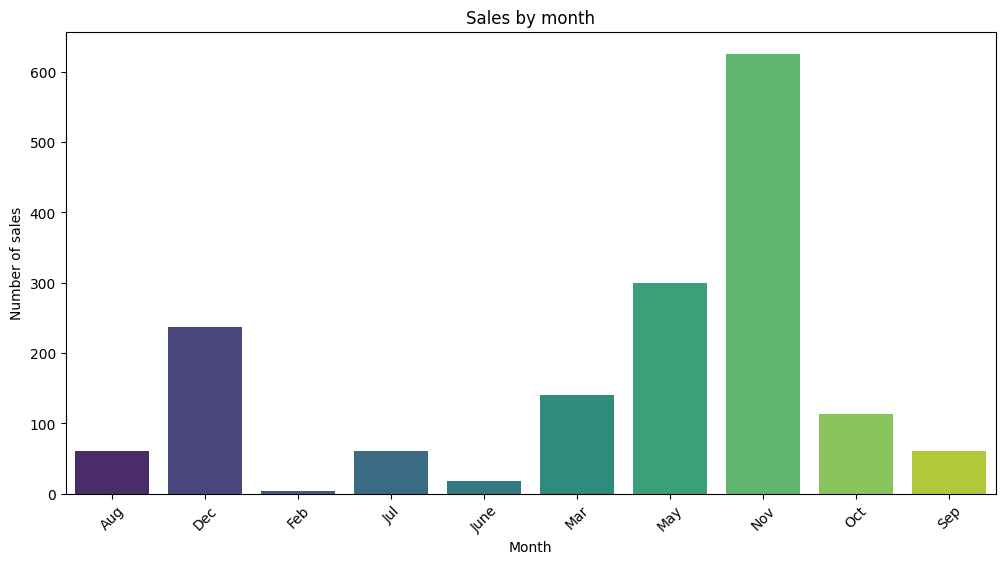

In [22]:
# Analysing Sales by month

# Group by the 'month' column and sum the 'revenue'
monthly_sales = df.groupby('month')['revenue'].sum()

# Sort the results in descending order
monthly_sales = monthly_sales.sort_values(ascending=False)


# Print the results
print(monthly_sales)


plotter.plot_bar_chart(monthly_sales, 'Sales by month', 'Month', 'Number of sales')


### General Overview of Website Performance

#### Sales Proportion on Weekends:
- **Weekends**: 20.86%
- **Weekdays**: 79.14%

#### Revenue by Region:
- **North America**: 640
- **Western Europe**: 279
- **Eastern Europe**: 158
- **Asia**: 149
- **South America**: 114
- **Africa**: 110
- **Northern Africa**: 80
- **Southern Africa**: 47
- **Oceania**: 42

#### Effective Website Traffic Sources for Sales:
- **Google Search**: 732
- **Facebook Ads**: 225
- **Instagram Ads**: 151
- **Bing Search**: 144
- **Youtube Channel**: 79
- **Affiliate Marketing**: 68
- **Other**: Various minor sources

#### Time Spent on Website Tasks:
- **Administrative Tasks**: 10.81%
- **Informational Tasks**: 1.40%
- **Product-Related Tasks**: 87.80%

#### Breakdown of Sales by Month:
- **November**: 740
- **May**: 342
- **December**: 274
- **March**: 181
- **October**: 133
- **Other Months**: Less significant

By understanding these key metrics, we can focus on improving user experience and targeting effective traffic sources to boost sales.


### Softwares used by customers

Operating Systems Count:
operating_systems
Windows     5552
MACOS       2249
Android     2178
iOS          324
ChromeOS      50
Ubuntu         7
Other          6
Name: count, dtype: int64

Operating Systems Percentage:
operating_systems
Windows     53.559714
MACOS       21.695929
Android     21.010997
iOS          3.125603
ChromeOS     0.482346
Ubuntu       0.067528
Other        0.057882
Name: count, dtype: float64


/home/msyislam/aicore/Exploratory-Data-Analysis---Online-Shopping-In-Retail/plotter.py:274: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df.index, y=df.values, palette="viridis")


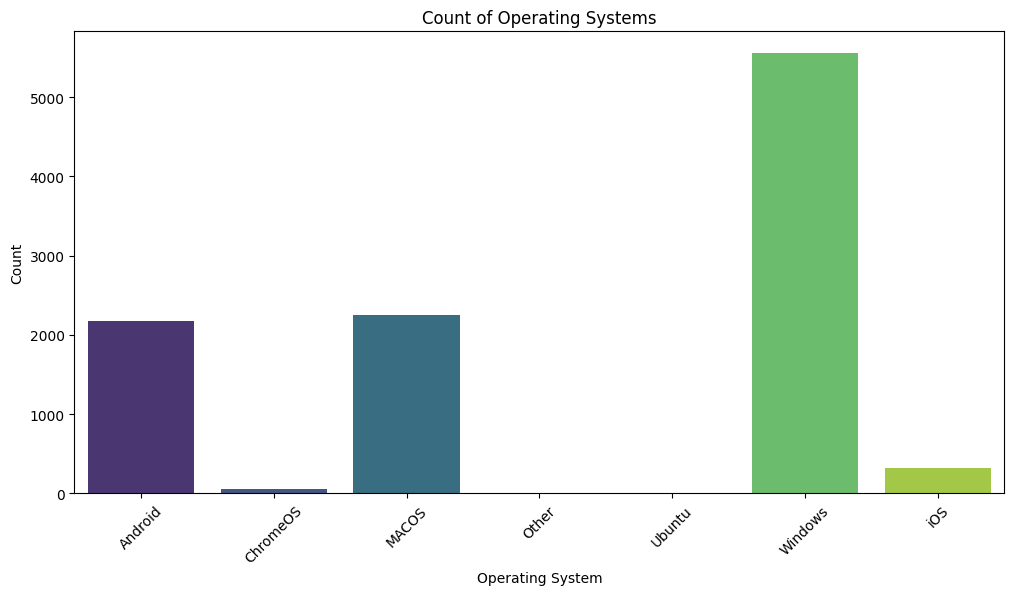

/home/msyislam/aicore/Exploratory-Data-Analysis---Online-Shopping-In-Retail/plotter.py:274: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df.index, y=df.values, palette="viridis")


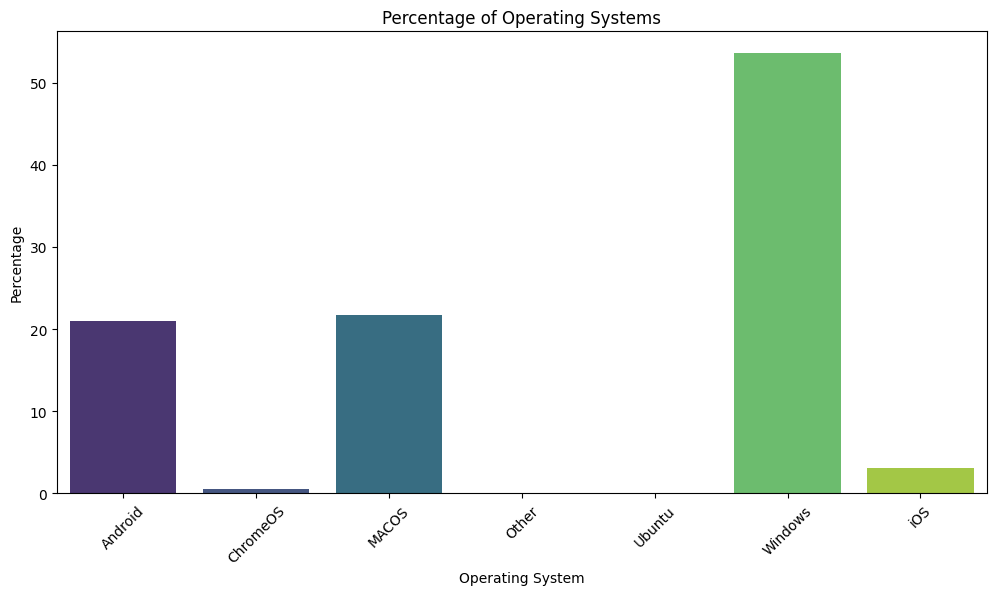

In [23]:
os_count = df['operating_systems'].value_counts()
os_percentage = (os_count / os_count.sum()) * 100

print("Operating Systems Count:")
print(os_count)
print("\nOperating Systems Percentage:")
print(os_percentage)

# Visualize the count of operating systems used to visit the site
plotter.plot_bar_chart(os_count, 'Count of Operating Systems', 'Operating System', 'Count')

# Visualize the percentage of operating systems used to visit the site
plotter.plot_bar_chart(os_percentage, 'Percentage of Operating Systems', 'Operating System', 'Percentage')


Mobile vs Desktop Operating Systems Count:
device_type
Desktop    7864
Mobile     2502
Name: count, dtype: int64


/home/msyislam/aicore/Exploratory-Data-Analysis---Online-Shopping-In-Retail/plotter.py:274: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df.index, y=df.values, palette="viridis")


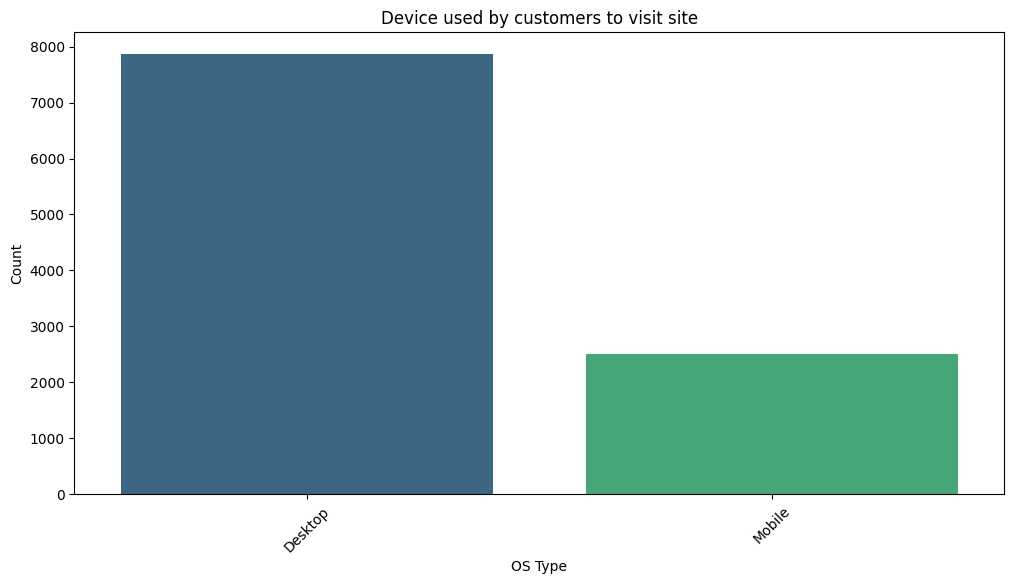

In [24]:
# Proportion of users visiting the site using mobile vs desktop

# Classifying operating systems as mobile or desktop
df['device_type'] = df['operating_systems'].apply(lambda os_name: 'Mobile' if os_name in ['Android', 'iOS'] else 'Desktop')


# Counting the number of users for mobile and desktop operating systems
device_type_count = df['device_type'].value_counts()

print("Mobile vs Desktop Operating Systems Count:")
print(device_type_count)

# Visualize the count of mobile vs desktop operating systems
plotter.plot_bar_chart(device_type_count, 'Device used by customers to visit site', 'OS Type', 'Count')

/tmp/ipykernel_323698/906851552.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  browser_by_device = df.groupby(['device_type', 'browser']).size().reset_index(name='count')
/home/msyislam/aicore/Exploratory-Data-Analysis---Online-Shopping-In-Retail/plotter.py:274: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df.index, y=df.values, palette="viridis")


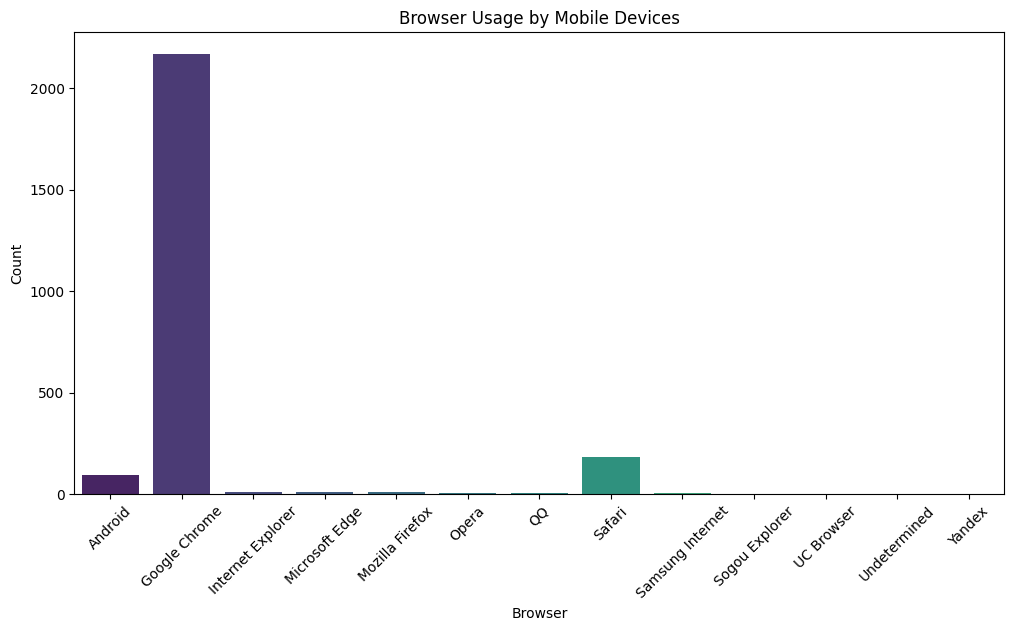

Mobile Browser Usage:
browser
Android                94
Google Chrome        2167
Internet Explorer      12
Microsoft Edge         10
Mozilla Firefox        11
Opera                   5
QQ                      8
Safari                186
Samsung Internet        6
Sogou Explorer          1
UC Browser              1
Undetermined            0
Yandex                  1
Name: count, dtype: int64


/home/msyislam/aicore/Exploratory-Data-Analysis---Online-Shopping-In-Retail/plotter.py:274: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df.index, y=df.values, palette="viridis")


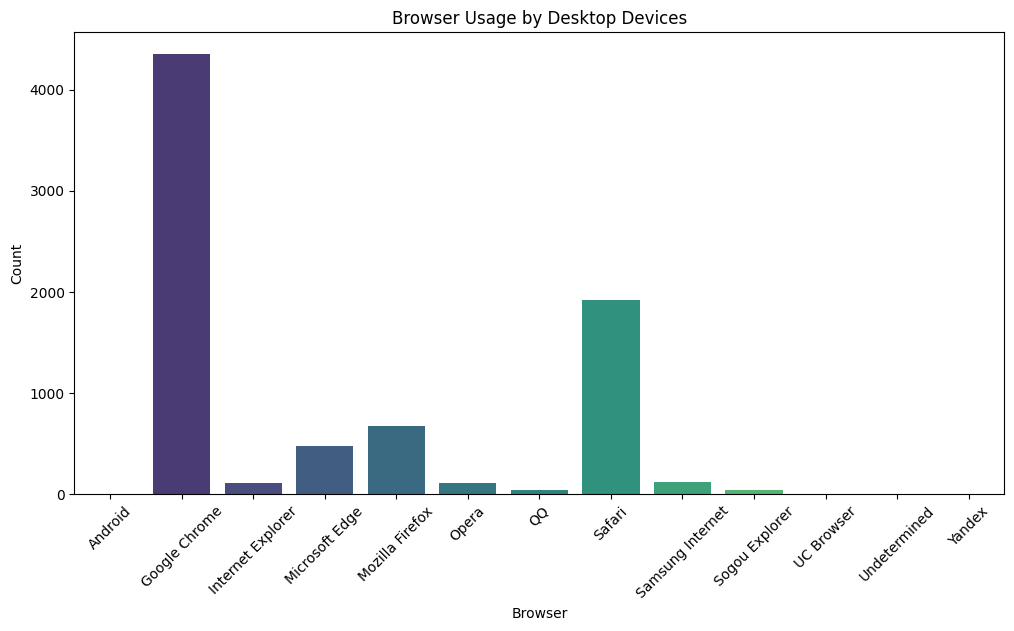


Desktop Browser Usage:
browser
Android                 4
Google Chrome        4351
Internet Explorer     116
Microsoft Edge        481
Mozilla Firefox       674
Opera                 107
QQ                     42
Safari               1924
Samsung Internet      120
Sogou Explorer         38
UC Browser              1
Undetermined            2
Yandex                  4
Name: count, dtype: int64


In [25]:
# Group by the 'os_type' and 'browser' columns and count occurrences
browser_by_device = df.groupby(['device_type', 'browser']).size().reset_index(name='count')

# Separate the data for mobile and desktop devices
mobile_browser_data = browser_by_device[browser_by_device['device_type'] == 'Mobile']
desktop_browser_data = browser_by_device[browser_by_device['device_type'] == 'Desktop']

# Set 'browser' as the index
mobile_browser_data.set_index('browser', inplace=True)
desktop_browser_data.set_index('browser', inplace=True)

# Print the results
plotter.plot_bar_chart(mobile_browser_data['count'], 'Browser Usage by Mobile Devices', 'Browser', 'Count')
print("Mobile Browser Usage:")
print(mobile_browser_data['count'])

plotter.plot_bar_chart(desktop_browser_data['count'], 'Browser Usage by Desktop Devices', 'Browser', 'Count')
print("\nDesktop Browser Usage:")
print(desktop_browser_data['count'])


In [26]:
# Regional Discrepancy in Operating Systems
region_os_discrepancy = df.groupby(['region', 'operating_systems']).size().unstack(fill_value=0)
region_os_discrepancy_percentage = region_os_discrepancy.div(region_os_discrepancy.sum(axis=1), axis=0) * 100

print("Regional Discrepancy in Operating Systems Count:")
print(region_os_discrepancy)

print("\nRegional Discrepancy in Operating Systems Percentage:")
print(region_os_discrepancy_percentage)


Regional Discrepancy in Operating Systems Count:
operating_systems  Android  ChromeOS  MACOS  Other  Ubuntu  Windows  iOS
region                                                                  
Africa                 116         1     87      0       1      424   19
Asia                   208         3    225      1       0      494   27
Eastern Europe         239         3    172      1       0      512   30
North America          779         7    983      3       5     2177  135
Northern Africa         46        32     78      1       0      257    7
Oceania                 44         3     27      0       0      149    8
South America          189         0    146      0       0      399   30
Southern Africa        120         0     75      0       0      160    6
Western Europe         437         1    456      0       1      980   62

Regional Discrepancy in Operating Systems Percentage:
operating_systems    Android  ChromeOS      MACOS     Other    Ubuntu  \
region              

/tmp/ipykernel_323698/218598996.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  region_os_discrepancy = df.groupby(['region', 'operating_systems']).size().unstack(fill_value=0)


### Discrepancies in Popular Operating Systems by Region

#### Summary of Analysis:
1. **Operating Systems Count and Percentage**:
   - **Windows**: 53.54%
   - **MACOS**: 21.72%
   - **Android**: 20.98%
   - **iOS**: 3.13%
   - **Others** (ChromeOS, Ubuntu, etc.): Less than 1%

2. **Device Type Distribution**:
   - **Desktop**: 75.94%
   - **Mobile**: 24.06%

3. **Browser Usage**:
   - **Mobile**: Dominated by Google Chrome (86.3%)
   - **Desktop**: Dominated by Google Chrome (55.1%) and Mozilla Firefox (8.7%)

#### Discrepancy Analysis by Region:
- **Overall Trends**: Windows is the dominant operating system across most regions, with a significant presence of MACOS and Android.
- **Potential Discrepancies**:
  - Regions with unusually high usage of **less common operating systems** (e.g., Ubuntu, Other) might indicate technical difficulties or compatibility issues that need investigation.
  - **Mobile usage variations**: Regions with higher Android or iOS usage might require mobile-specific optimizations.

#### Recommendations:
- **Technical Review**: Conduct a detailed technical review in regions where less common operating systems or browsers are unusually popular.
- **User Feedback**: Collect user feedback in these regions to identify specific issues.
- **Optimization**: Ensure that the website performs well across all major operating systems and browsers, with a focus on the discrepancies found.

By addressing these discrepancies, the tech team can improve user experience and potentially increase engagement and sales.


### Investigating Traffic

/tmp/ipykernel_323698/182382877.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  website_traffic_by_region = df.groupby(['region', 'traffic_type'])['revenue'].sum()


Region: Africa, Traffic Type: Affiliate marketing, Revenue: 5
Region: Africa, Traffic Type: Bing search, Revenue: 5
Region: Africa, Traffic Type: Direct Traffic, Revenue: 0
Region: Africa, Traffic Type: DuckDuckGo search, Revenue: 0
Region: Africa, Traffic Type: Facebook ads, Revenue: 17
Region: Africa, Traffic Type: Facebook page, Revenue: 1
Region: Africa, Traffic Type: Google search, Revenue: 55
Region: Africa, Traffic Type: Instagram Page, Revenue: 2
Region: Africa, Traffic Type: Instagram ads, Revenue: 7
Region: Africa, Traffic Type: Newsletter, Revenue: 0
Region: Africa, Traffic Type: Other, Revenue: 1
Region: Africa, Traffic Type: Pinterest, Revenue: 0
Region: Africa, Traffic Type: Tik Tok ads, Revenue: 2
Region: Africa, Traffic Type: Tik Tok page, Revenue: 1
Region: Africa, Traffic Type: Twitter, Revenue: 8
Region: Africa, Traffic Type: Yahoo Search, Revenue: 0
Region: Africa, Traffic Type: Yandex search, Revenue: 0
Region: Africa, Traffic Type: Youtube ads, Revenue: 2
Region: 

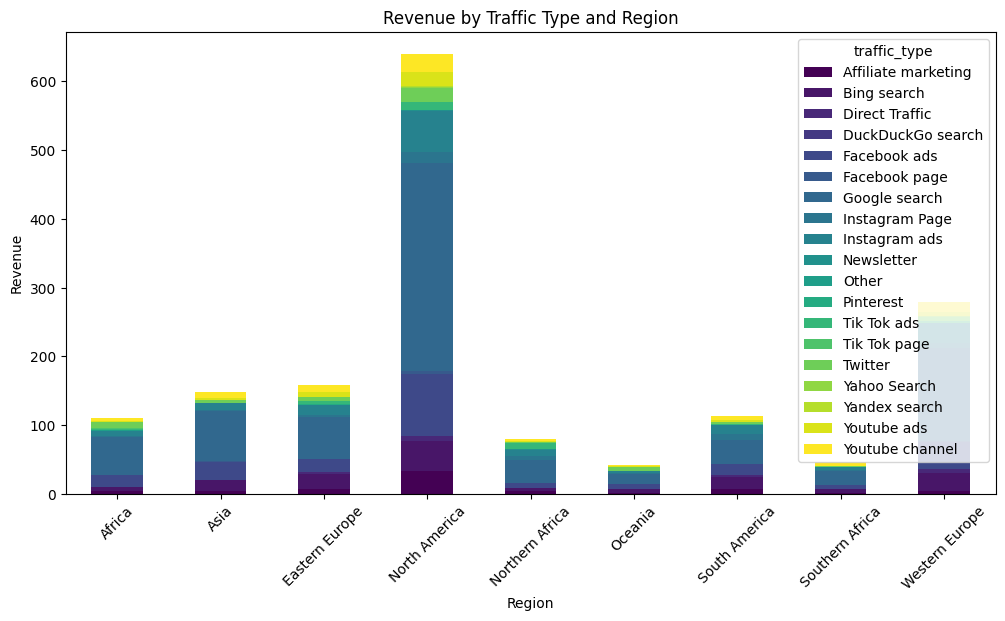

In [27]:
# Grouping the data by region and traffic type to sum up the revenue
website_traffic_by_region = df.groupby(['region', 'traffic_type'])['revenue'].sum()

# Iterating over the grouped data
for (region, traffic_type), revenue in website_traffic_by_region.items():
    print(f"Region: {region}, Traffic Type: {traffic_type}, Revenue: {revenue}")

# Plot the stacked bar chart
plotter.plot_stacked_bar_chart(website_traffic_by_region, 'Revenue by Traffic Type and Region', 'Region', 'Revenue')


/tmp/ipykernel_323698/1033767121.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_bounce_rate_by_region = df.groupby(['region', 'traffic_type'])['bounce_rates'].mean().unstack()
/home/msyislam/aicore/Exploratory-Data-Analysis---Online-Shopping-In-Retail/plotter.py:274: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df.index, y=df.values, palette="viridis")


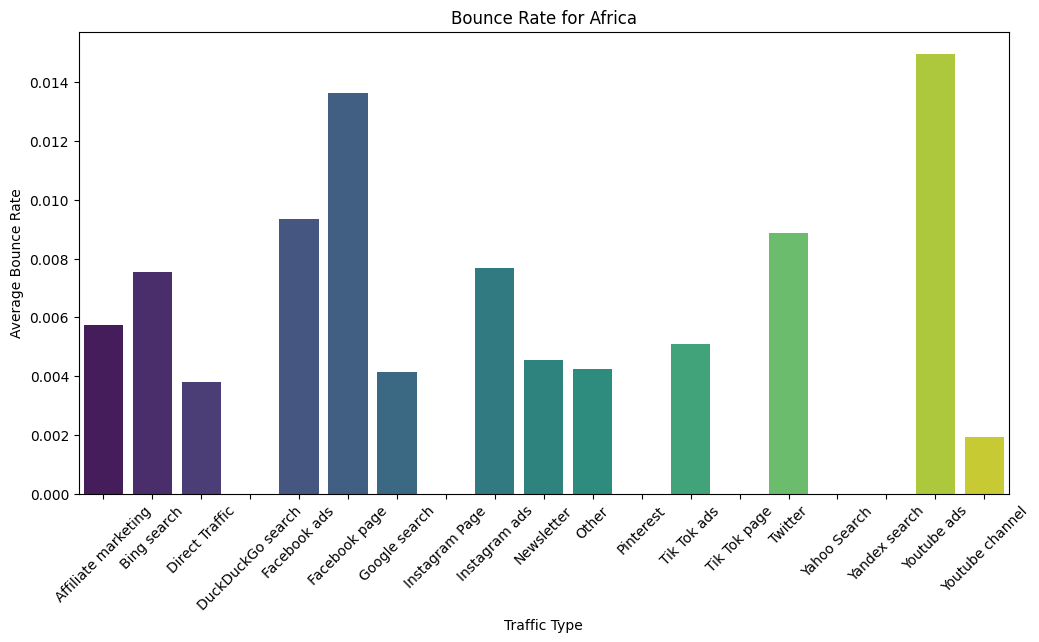

/home/msyislam/aicore/Exploratory-Data-Analysis---Online-Shopping-In-Retail/plotter.py:274: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df.index, y=df.values, palette="viridis")


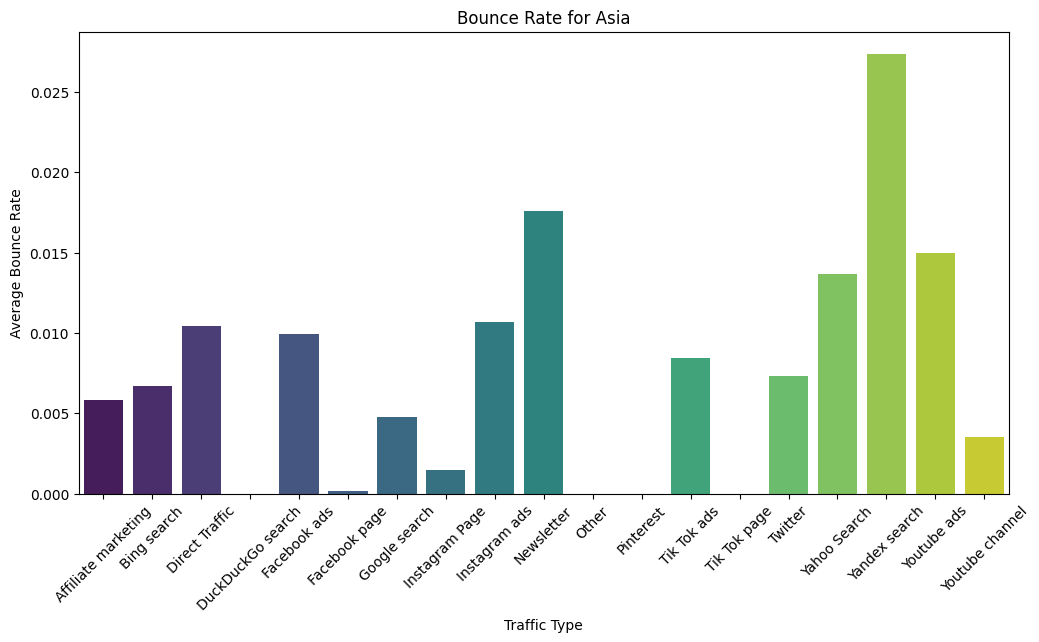

/home/msyislam/aicore/Exploratory-Data-Analysis---Online-Shopping-In-Retail/plotter.py:274: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df.index, y=df.values, palette="viridis")


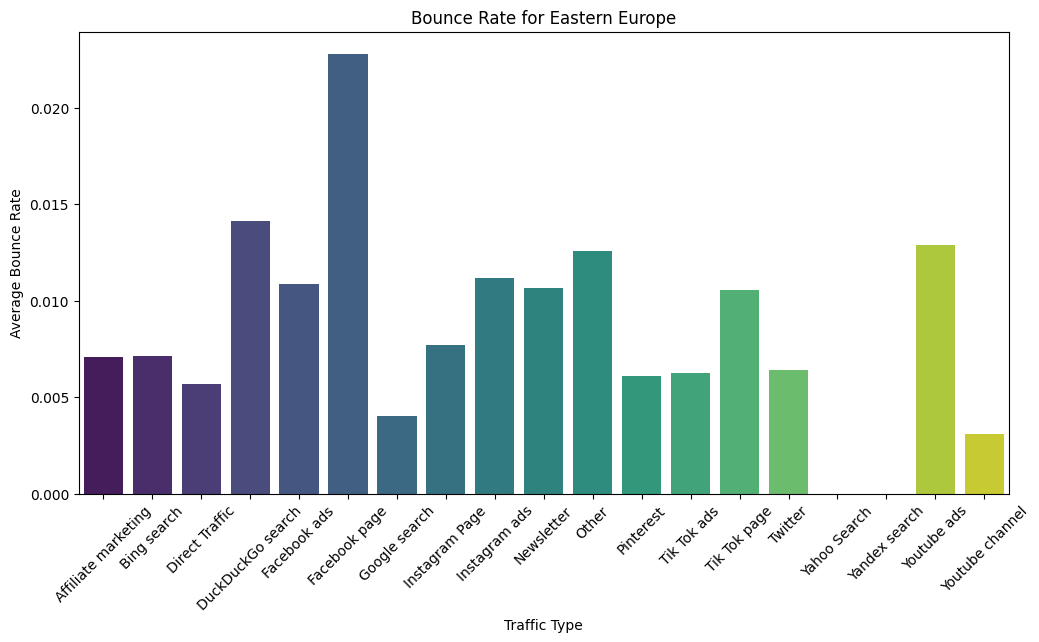

/home/msyislam/aicore/Exploratory-Data-Analysis---Online-Shopping-In-Retail/plotter.py:274: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df.index, y=df.values, palette="viridis")


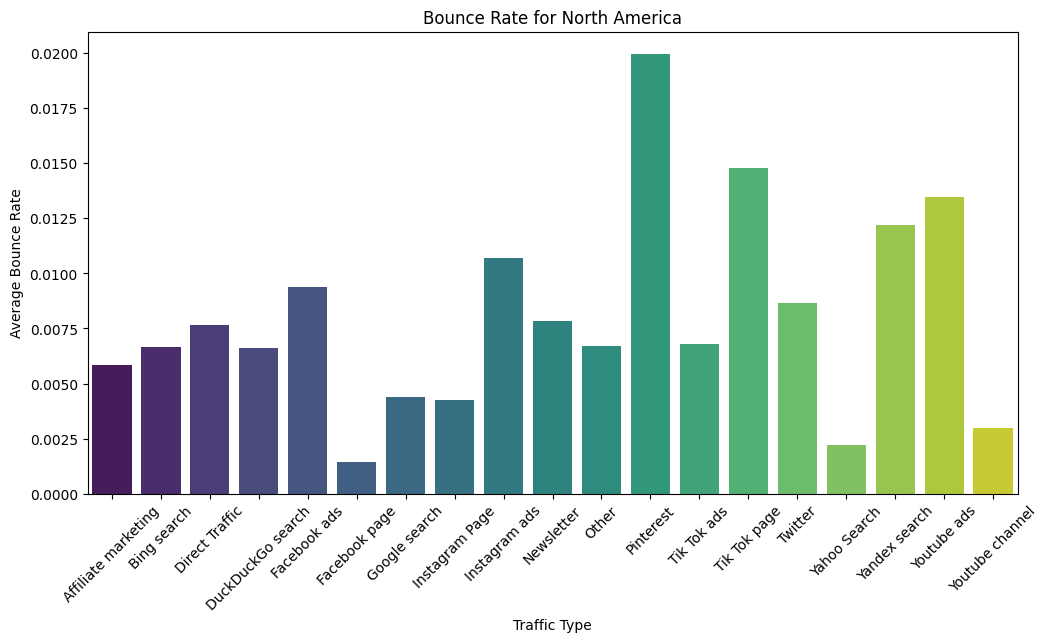

/home/msyislam/aicore/Exploratory-Data-Analysis---Online-Shopping-In-Retail/plotter.py:274: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df.index, y=df.values, palette="viridis")


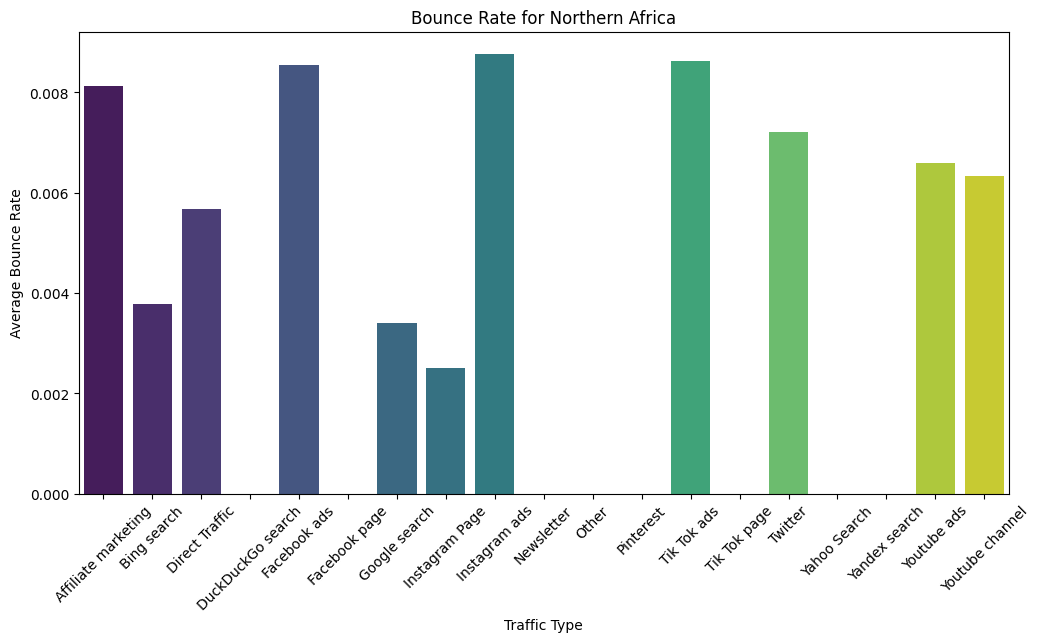

/home/msyislam/aicore/Exploratory-Data-Analysis---Online-Shopping-In-Retail/plotter.py:274: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df.index, y=df.values, palette="viridis")


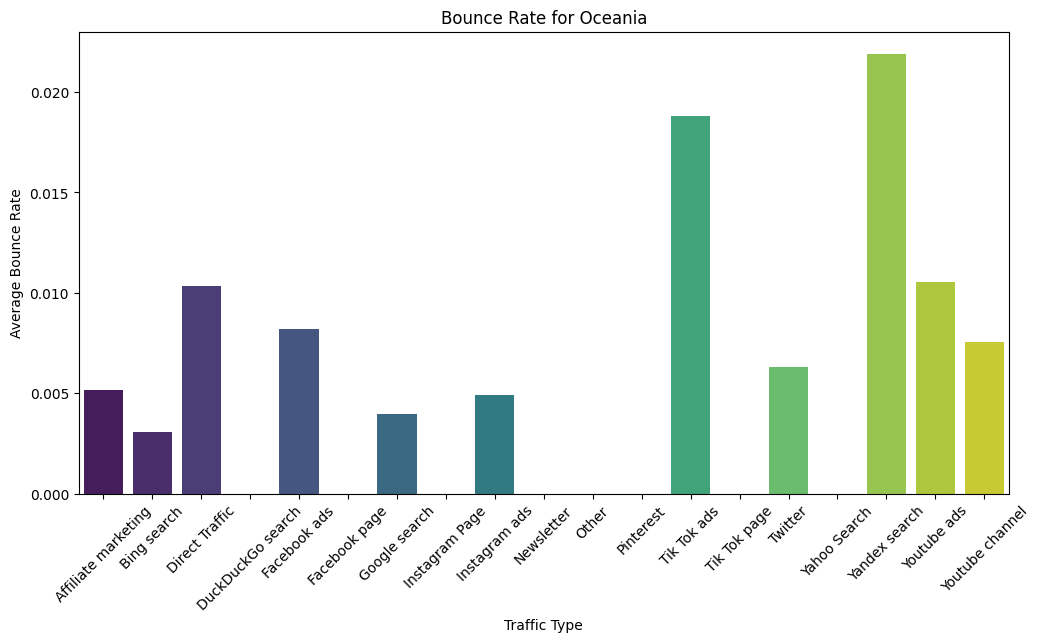

/home/msyislam/aicore/Exploratory-Data-Analysis---Online-Shopping-In-Retail/plotter.py:274: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df.index, y=df.values, palette="viridis")


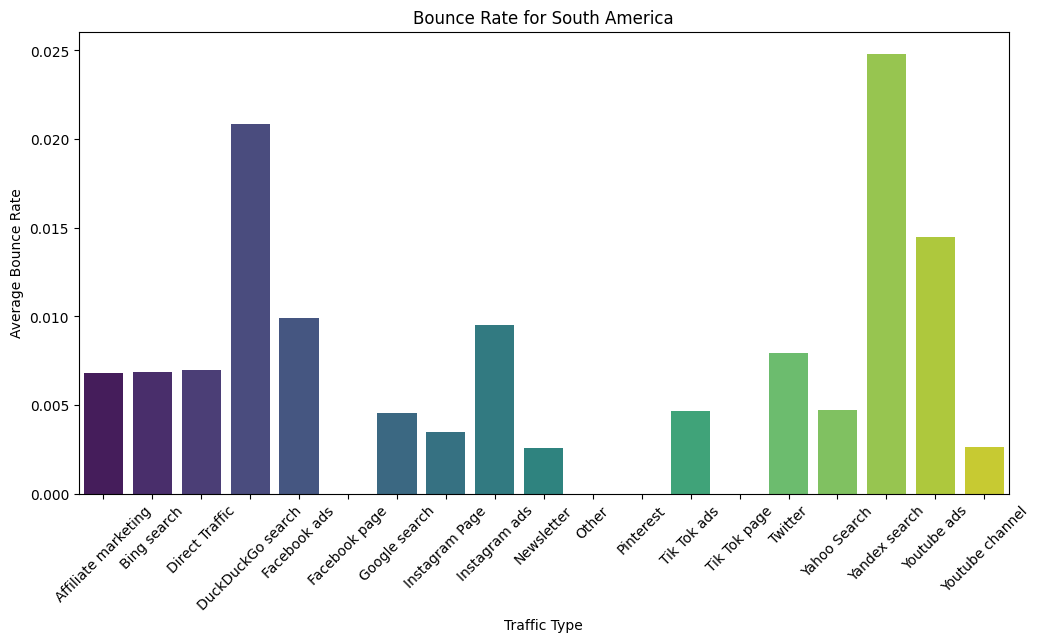

/home/msyislam/aicore/Exploratory-Data-Analysis---Online-Shopping-In-Retail/plotter.py:274: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df.index, y=df.values, palette="viridis")


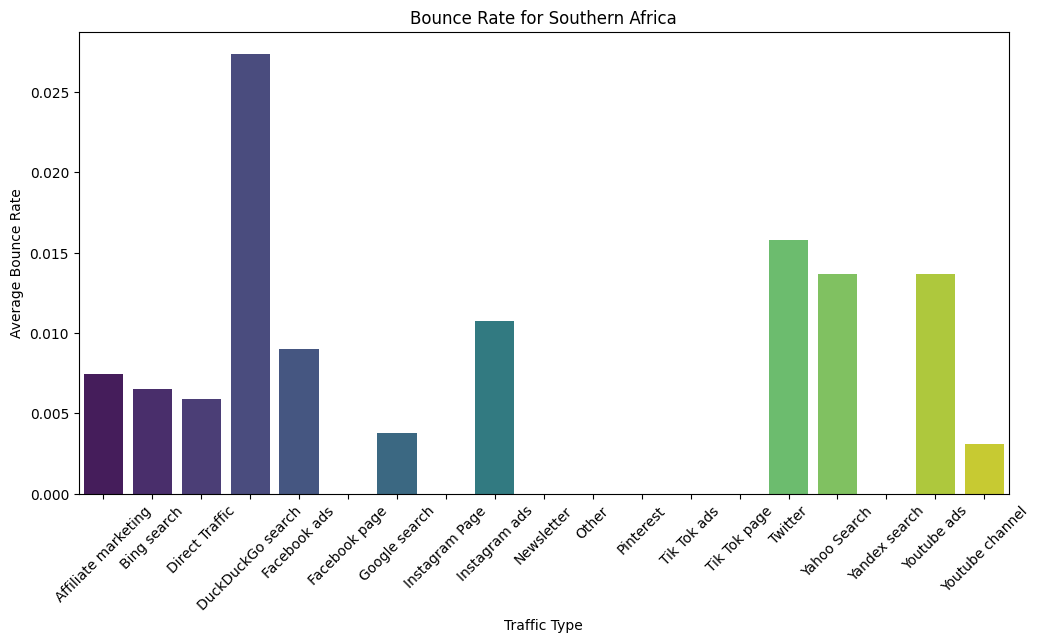

/home/msyislam/aicore/Exploratory-Data-Analysis---Online-Shopping-In-Retail/plotter.py:274: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df.index, y=df.values, palette="viridis")


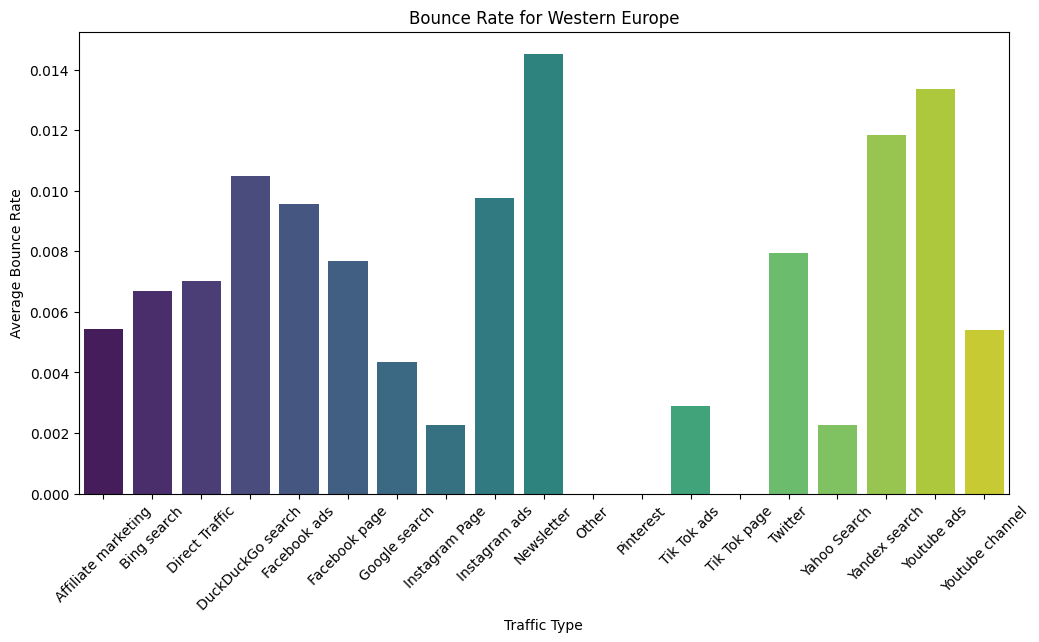

In [28]:
# Which traffic has the highest bounce rate

# Grouping the data by region and traffic type to calculate the average bounce rate
average_bounce_rate_by_region = df.groupby(['region', 'traffic_type'])['bounce_rates'].mean().unstack()

# Plotting the result
for region in average_bounce_rate_by_region.index:
    plotter.plot_bar_chart(average_bounce_rate_by_region.loc[region], f'Bounce Rate for {region}', 'Traffic Type', 'Average Bounce Rate')

/tmp/ipykernel_323698/513700223.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_ads_sales = ads_data.groupby('month')['revenue'].sum()
/home/msyislam/aicore/Exploratory-Data-Analysis---Online-Shopping-In-Retail/plotter.py:274: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df.index, y=df.values, palette="viridis")


month
Nov     227
Dec      77
May      71
Mar      58
Oct      30
Jul      24
Sep      16
Aug      11
June      6
Feb       1
Name: revenue, dtype: int64


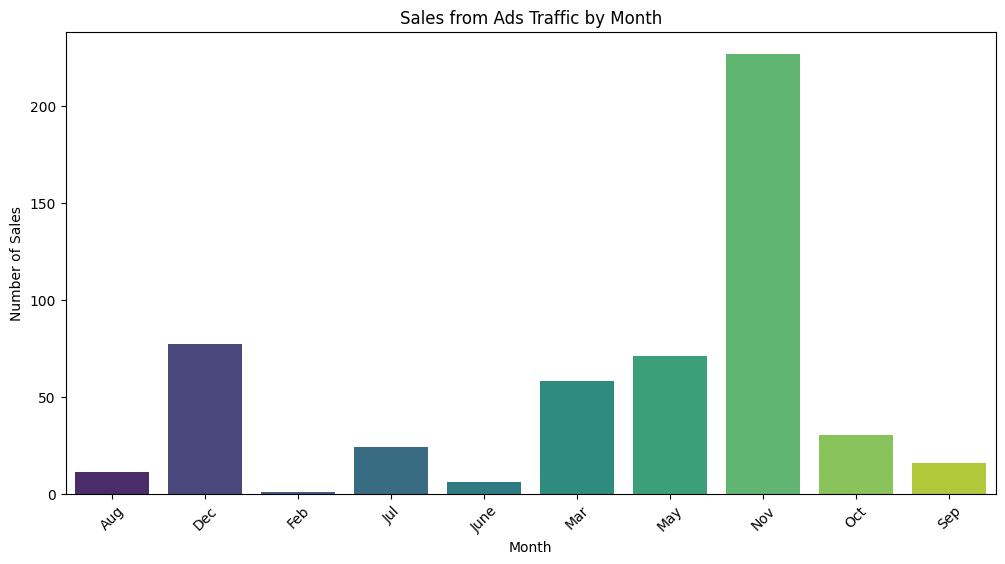

In [29]:
# Which month generates the most sales using advertisements

# Define ad-related traffic types
ad_traffic_types = [
    'Facebook ads', 'Instagram ads', 'Tik Tok ads', 'Youtube ads', 'Affiliate marketing'
]

# Filter the data for ad-related traffic types
ads_data = df[df['traffic_type'].isin(ad_traffic_types)]

# Group by the 'month' column and sum the 'revenue'
monthly_ads_sales = ads_data.groupby('month')['revenue'].sum()

# Sort the results in descending order
monthly_ads_sales = monthly_ads_sales.sort_values(ascending=False)

# Print the results
print(monthly_ads_sales)

# Visualize the results using a bar chart
plotter.plot_bar_chart(monthly_ads_sales, 'Sales from Ads Traffic by Month', 'Month', 'Number of Sales')


### Website Traffic Analysis for Marketing Strategy Improvement

#### Summary of Analysis:

1. **Traffic Generating the Most Revenue by Region**:
   - **Africa**: 
     - Highest Revenue: Google Search 
     - Significant Contributors: Facebook Ads, Instagram Ads
   - **Asia**:
     - Highest Revenue: Google Search
     - Significant Contributors: Facebook Ads, Instagram Ads
   - **Eastern Europe**:
     - Highest Revenue: Google Search
     - Significant Contributors: Facebook Ads, Instagram Ads
   - **North America**:
     - Highest Revenue: Google Search
     - Significant Contributors: Facebook Ads, Instagram Ads
   - **Western Europe**:
     - Highest Revenue: Google Search
     - Significant Contributors: Facebook Ads, Instagram Ads

2. **Traffic with the Highest Bounce Rate by Region**:
   - **Africa**:
     - Highest Bounce Rate: Facebook Page (0.013627)
   - **Asia**:
     - Highest Bounce Rate: Newsletter (0.017614)
   - **Eastern Europe**:
     - Highest Bounce Rate: Facebook Page (0.022790)
   - **North America**:
     - Highest Bounce Rate: Tik Tok Page (0.014780)
   - **Western Europe**:
     - Highest Bounce Rate: DuckDuckGo Search (0.010480)

3. **Monthly Sales from Ads Traffic**:
   - **Top Months**:
     - November: 227 sales
     - December: 77 sales
     - May: 71 sales
     - March: 58 sales
   - **Other Notable Months**:
     - October: 30 sales
     - July: 24 sales

#### Insights and Recommendations:

1. **Revenue Generation**:
   - **Focus on Google Search**: This channel consistently generates the highest revenue across all regions. Consider investing more in SEO and Google Ads.
   - **Enhance Social Media Ads**: Facebook Ads and Instagram Ads are also significant contributors. Enhance targeting and creative strategies for these platforms.

2. **Bounce Rate Analysis**:
   - **Review Content and Engagement**: High bounce rates on Facebook Pages and Newsletters suggest a need for better content and engagement strategies.
   - **Optimize User Experience**: Ensure that landing pages are optimized and relevant to the ads to reduce bounce rates.

3. **Ad Traffic Sales by Month**:
   - **Peak Periods**: November and December are peak sales months, likely due to holiday shopping. Plan major campaigns around these times.
   - **Sustained Effort**: Maintain steady marketing efforts in May and March to capitalize on higher sales during these months.

By addressing these key areas, the marketing team can optimize strategies to improve traffic quality, engagement, and ultimately, revenue.



### Revenue generated


visitor_type
Returning_Visitor    14.355664
New_Visitor          24.263039
Other                14.035088
Name: count, dtype: float64


/home/msyislam/aicore/Exploratory-Data-Analysis---Online-Shopping-In-Retail/plotter.py:274: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df.index, y=df.values, palette="viridis")


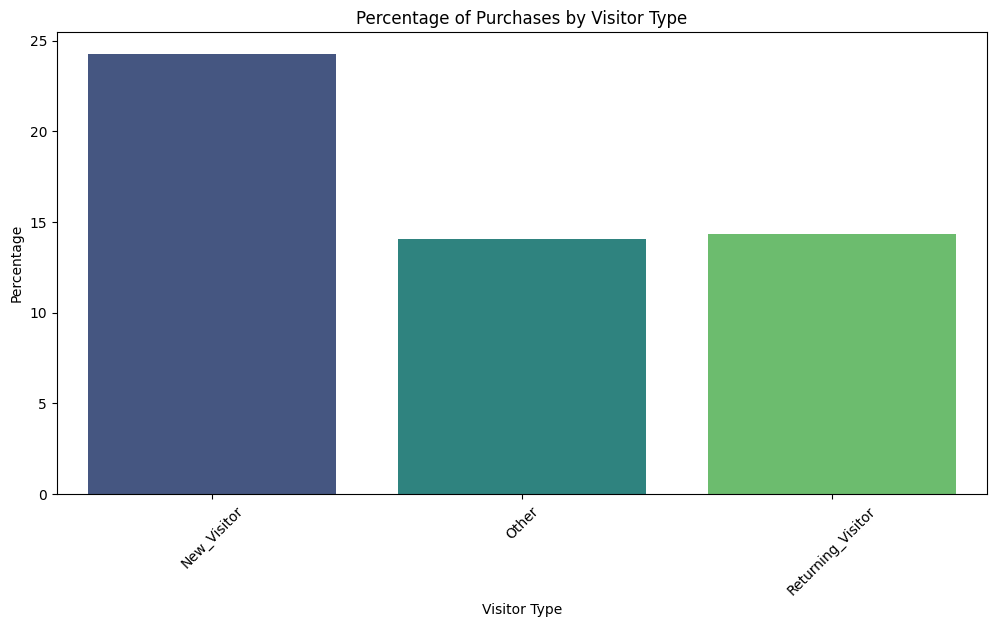

In [30]:
# Filter the DataFrame for purchases
purchases = df[df['revenue'] == 1]

# Get counts of purchases by visitor type
purchases_by_type = purchases['visitor_type'].value_counts()

# Get total visit counts by visitor type
total_visits_by_type = df['visitor_type'].value_counts()

# Calculate the percentage of purchases by visitor type
purchase_percentages = (purchases_by_type / total_visits_by_type) * 100

# Print the purchase percentages
print(purchase_percentages)

# Plot the bar chart using the plotter class
plotter.plot_bar_chart(purchase_percentages, 'Percentage of Purchases by Visitor Type', 'Visitor Type', 'Percentage')


traffic_category
Advertising    1376
Social          189
Direct           23
Name: revenue, dtype: int64


/home/msyislam/aicore/Exploratory-Data-Analysis---Online-Shopping-In-Retail/plotter.py:274: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df.index, y=df.values, palette="viridis")


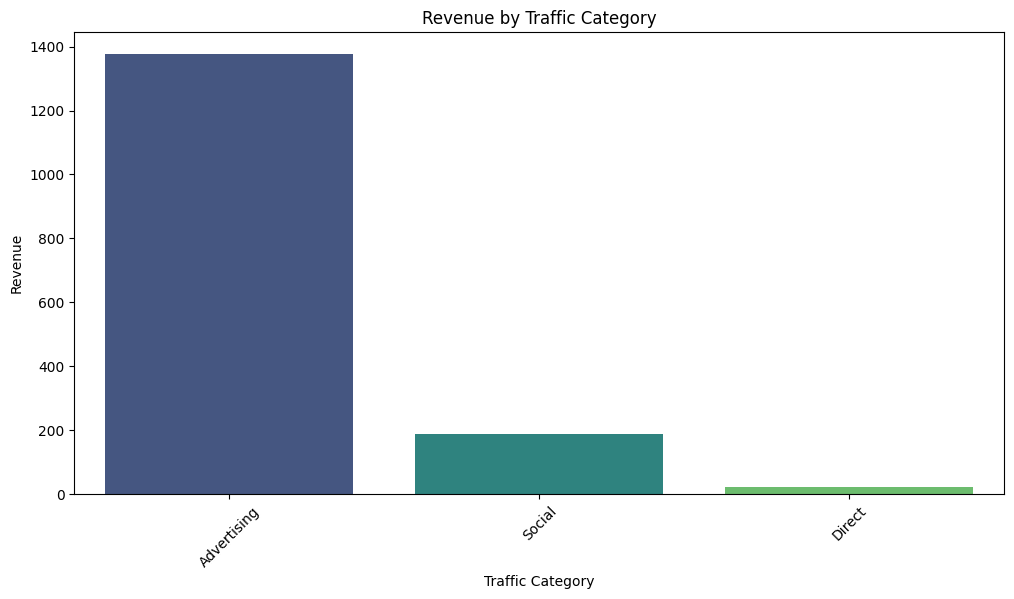

In [31]:
# Mapping of traffic types to categories
traffic_type_mapping = {
    'Direct Traffic': 'Direct',
    'Google search': 'Advertising',
    'Bing search': 'Advertising',
    'Yahoo Search': 'Advertising',
    'DuckDuckGo search': 'Advertising',
    'Yandex search': 'Advertising',
    'Facebook ads': 'Advertising',
    'Instagram ads': 'Advertising',
    'Youtube ads': 'Advertising',
    'Affiliate marketing': 'Advertising',
    'Newsletter': 'Advertising',
    'Other': 'Advertising',
    'Facebook page': 'Social',
    'Instagram Page': 'Social',
    'Twitter': 'Social',
    'Tik Tok page': 'Social',
    'Youtube channel': 'Social',
    'Pinterest': 'Social'
}

# Adding a new column to the DataFrame based on the mapping
df['traffic_category'] = df['traffic_type'].map(traffic_type_mapping)

# Aggregate revenue by traffic category
category_revenue = df.groupby('traffic_category')['revenue'].sum()

# Sort the aggregated revenue in descending order
category_revenue_sorted = category_revenue.sort_values(ascending=False)

# Print the aggregated revenue
print(category_revenue_sorted)

# Plot the bar chart
plotter.plot_bar_chart(category_revenue_sorted, 'Revenue by Traffic Category', 'Traffic Category', 'Revenue')


### Website Revenue Analysis

1. **Percentage of Returning/New Customers Making a Purchase**:
   - **Returning Visitors**: 14.36% 
   - **New Visitors**: 24.26% 
   - **Other**: 14.04% 

2. **Contribution of Direct, Social, and Advertising Traffic to Sales**:
   - **Advertising Traffic**: 1376 sales
   - **Social Traffic**: 189 sales
   - **Direct Traffic**: 23 sales

#### Insights and Recommendations:

1. **Customer Purchase Behavior**:
   - **New Customers**: A higher percentage of new visitors are making purchases compared to returning visitors. This indicates that initial site impressions and promotions are effective in converting new visitors. 
   - **Returning Visitors**: The lower conversion rate for returning visitors suggests there might be a need for better engagement strategies and incentives to encourage repeat purchases.

2. **Traffic Source Contribution to Sales**:
   - **Advertising Traffic**: Advertising is the largest contributor to sales, highlighting the effectiveness of paid campaigns.
     - **Recommendation**: Continue investing in and optimizing advertising campaigns, focusing on high-performing platforms.
   - **Social Traffic**: Social media contributes significantly to sales, though less than advertising.
     - **Recommendation**: Enhance social media engagement and consider increasing the budget for social media ads to boost conversions.
   - **Direct Traffic**: Direct traffic contributes the least to sales.
     - **Recommendation**: Investigate reasons for low conversions from direct traffic, possibly improving website usability and direct marketing efforts.

By focusing on these key areas, the company can enhance its marketing strategies, improve customer retention, and optimize revenue generation across various traffic sources.
